In [ ]:
import tensorflow as tf
import numpy as np
import keras
# import keras 

# Simplest Model

In [ ]:
xs= np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
ys=np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(xs,ys, epochs=500, )

In [ ]:
new_input=[7.0]
model.predict(new_input)

- As we can see changing the Optimzer drastically chnages the models performance and ability to generalise

## <font color='red'>The most important section are 1)making sure the data is structured and labeled RIGHT before passing it to the model. 2) Also making sure the models input shape corresponds to the cleaned/organised data </font>

# Simple Computer Vision problems


In [ ]:
#we can load the Fashion-MNIST from Keras
# fashion_mnist= keras.datasets.fashion_mnist
number_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)= number_mnist.load_data()

In [ ]:
#60K train 10K test split

#60,000 images of size 28x28 for training 
#60,000 labels corresponding to the train images

#10,000 images of size 28x28 for testing
#10,000 labels corresponding to the testing images

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

In [ ]:
#Normalization
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
model=tf.keras.models.Sequential([
#Flatten layer multiplies out the 28x28 image size so that it can 1D(784)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(train_images,train_labels, epochs=5)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[5])

### Main Points for CV
 
<b>1) We need Flatten the image first hand specifying the input shape</b><br>
<b>2) We need to normalise the data for better performance</b><br><br>
<b>3) For multiclassification problems we need to use 'sparse_categorical_crossentropy'</b><br>
<b>4) For multiclassification problems we need to use 'softmax' activation function on the last layer (in the shape of output classes)</b><br><br>
<font color='red'> Make sure to  pass the model 3D image to the Conv2D input shape as it expects 3D array.</font>  So you may need to add a dimension; Also Conv1D would expect 2D..

In [ ]:
#evaluating the model
print('loss and accuracy')
print(model.evaluate(test_images,test_labels, verbose=0))


# Basic  Convolutions
- <b> Convolutions work by highlighting the most prominent features in the image to help identify patterns. </b>
- <b>Usually we convolve around original image to produce a new version of it</b>
- <b> Consequently, we can start mapping out <u>general distinctive shapes</u> in the image and tell the difference between a 'shoe' and a 'handbag'.</b>


In [ ]:
#reshape the images as Convolution expect 3D images
train_images= train_images.reshape(60000,28,28,1)

model= tf.keras.models.Sequential([
    # We pass how many versions of the image we wanna create
    #we then specify the filter size we should use and image shape
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
#Reduces the information whilst emphasise the main features(the pixels that are ON)
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(train_images,train_labels, epochs=5)

In [ ]:
import matplotlib.pyplot as plt



f, axarr = plt.subplots(3,4)

FIRST_IMAGE=3
SECOND_IMAGE=25
THIRD_IMAGE= 28

CONVOLUTION_NUMBER=1

from tensorflow.keras import models
#gets the layer output of images from our previously trained model
layer_outputs= [layer.output for layer in model.layers]
#gets the image inputed to our model
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1= activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER ], cmap='inferno')
    axarr[0,x].grid(False)
    
    f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER ], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER ], cmap='inferno')
    axarr[2,x].grid(False)
    


### Main Points for Convolutions
- Make sure to <b>resize image (add a dimension) in order for the convolution to process it.</b>
- <b>Do not add too many Convolutions as the DNN may not be able to pick up the patterns/simmilarity between objects during training.</b><br>
- The <b>Pooling layer <font color='red'> is as important</font> as the Convolutions emphasise the features spotted by the convolutions by CONDESING them </b> (to have stronger/potent signal)</b>
e.g In the image above the number zeros above still need to be able relate to each other even after the convolutions for the neural network to learn.

# CNN using ImageDataGenerator
- <b>ImageDataGenerator allows us to load images whilst making modifications directly from local folders</b>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

In [ ]:
#unzip files
local_zip='horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horses and humans')#create a new extracted folder
zip_ref.close()

In [ ]:
#specify a directory
train_horse_dir= os.path.join('horses and humans/horses')
train_human_dir= os.path.join('horses and humans/humans')

In [ ]:
#list the files in directory
train_horses_names= os.listdir(train_horse_dir)
print(train_horses_names[:3])

train_humans_names= os.listdir(train_human_dir)
print(train_humans_names[:3])

In [ ]:
#number of images
print(len(train_horses_names))
print(len(train_humans_names))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#To visualise the images in directory
#parameters for our graph
nrows= 4
ncols= 4
#index for iteratingover images
pic_index=0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig= plt.gcf()
fig.set_size_inches(ncols * 4, nrows *4)

pic_index+=8

next_horse_pix= [os.path.join(train_horse_dir, fname)
                 for fname in train_horses_names[pic_index-8:pic_index]]
next_human_pix= [os.path.join(train_human_dir, fname)
                 for fname in train_humans_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp= plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img= mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [ ]:
#normalize the data for TRAINING Folder
train_datagen= ImageDataGenerator(rescale=1/255)
#load the train dir of horses and humans and resize images
#and also specify the model class (binary classification)
train_generator= train_datagen.flow_from_directory(
'horses and humans', #folder path
target_size=(300,300),#resize images
batch_size=128,#specify how many images to process at a time
class_mode='binary')#specify the type of model being contructed

- <b><font color='red'> The target_size and input shape of the model need to be the same</font>. As we are working with 3D colour(RGB) images, we need add a 3rd dimesion to the input(for RGB)

In [ ]:
model= tf.keras.models.Sequential([
    #the image shape is 300,300,3 as its colour image (RGB)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #one neuron used as its binary classification (sigmoid- 0 or 1) 
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model.summary()

In [ ]:
#import optimizer
from tensorflow.keras.optimizers import RMSprop

#RMS prop allows us to specify learning rate to
#We specify binary_crossentropy as problem is a binary clasification problem
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [ ]:
#train the model
history= model.fit_generator(
train_generator, #streams data from directory
steps_per_epoch=8,# len of images in directory devided batch size specified
epochs=1,
# validation_data= validation_generator,
verbose=2)


##### For testing model on new images

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = file.upload()

for fn in uploaded.keys():
    
    path= '/content/' + fn
    img= image.load_img(path, target_size=(300,300))
    
    x= image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    
    images= np.vstack([x])
    classes= model.predict(images, batch_size=10)
    
    print(classes[0])
    if classes[0]>0.5:
        print(fn + 'is a human')
    else:
        print(fn + 'is a horse')


#### <u>summary for using CNN using ImageDataGenerator</u>
    
- <b>We have to make sure that our folders are correctly labeled and organised as ImageDataGenerator expects the folders in a specific manner.</b>

In [ ]:
from IPython.display import Image
Image('ImageDataGenerator.jpg')

# Cleaning, seperating (training and testing) and moving data into folders before feeding to ImageDataGenerator
- When dealing with real world data we may come across <b>corrupted files </b>and Nan values, also we may need to <b>seperate and create folders for training and testing programmatically

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
#get and unzip the file
import zipfile

local_zip= 'cats_dogs.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
#create a new folder for extracted items
zip_ref.extractall('cats_and_dogs2')
zip_ref.close()

In [ ]:
#check the strcuture of the folder that you extracted
os.listdir('cats_and_dogs2/PetImages/')

In [ ]:
#number of images
print(len(os.listdir('cats_and_dogs2/PetImages/Cat')))
print(len(os.listdir('cats_and_dogs2/PetImages/Dog')))

In [ ]:
# delete corupted small files
for i in os.listdir('cats_and_dogs2/PetImages/Cat/'):
    #delete files less than 0.1 bytes
    if os.path.getsize('cats_and_dogs2/PetImages/Cat/'+i)<0.1:
        os.remove('cats_and_dogs2/PetImages/Cat/'+i)
        print('Found file')
        

In [ ]:
#create the folder structure 
os.mkdir('Cats and dogs folder')


os.mkdir('Cats and dogs folder/training')
os.mkdir('Cats and dogs folder/validation')

os.mkdir('Cats and dogs folder/training/cats')
os.mkdir('Cats and dogs folder/training/dogs')

os.mkdir('Cats and dogs folder/validation/cats')
os.mkdir('Cats and dogs folder/validation/dogs')

In [ ]:
#we will be using 1000 for training and 250 for testing
cats=os.listdir('cats_and_dogs2/PetImages/Cat')
dogs=os.listdir('cats_and_dogs2/PetImages/Dog')

training_cats=cats[0:1000]
training_dogs=dogs[0:1000]

testing_cats=cats[1000:1250]
testing_dogs=dogs[1000:1250]

In [ ]:
import shutil

#loop through the images and transfer images to the new correct folders accordingly

#moving training cats
for i in training_cats:
    source='cats_and_dogs2/PetImages/Cat/{}'.format(i)
    destination_folder='Cats and dogs folder/training/cats'
    
    move= shutil.move(source,destination_folder )
    
#moving testingcats
for i in testing_cats:
    source='cats_and_dogs2/PetImages/Cat/{}'.format(i)
    destination_folder='Cats and dogs folder/validation/cats'
    
    move= shutil.move(source,destination_folder )

#moving training dogs
for i in training_dogs:
    source='cats_and_dogs2/PetImages/Dog/{}'.format(i)
    destination_folder='Cats and dogs folder/training/dogs'
    
    move= shutil.move(source,destination_folder )

#moving testing dogs
for i in testing_dogs:
    source='cats_and_dogs2/PetImages/Dog/{}'.format(i)
    destination_folder='Cats and dogs folder/validation/dogs'
    
    move= shutil.move(source,destination_folder )

- 1) check the structure of the ORIGINAL folder and where the images are located 
- 2) Create a new folder and subfolders in the structure ImageDataGenerator expects
- 3) Organise the training and testing images that are found in the ORIGINAL folder using indexing
- 4) Use <b>Shutil</b> to <u>move(not copy)</u> the images from the ORIGINAL folder to the newly created training and testing subfolder.



In [ ]:
########### METHOD 2 for splitiing and populating images ##########################################


#create the folders in the frame ImageDataGenerator expects and 
#have the path correctly identified
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"


#populate the subfolders with the images
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    #list images in original folder
    img_list= os.listdir(SOURCE)
    #shuffle images
    shuffled_images_list=random.sample(img_list, len(img_list))
    
    #create indexes to split training and testing data
    number_of_images=int(len(img_list))
    index_pointer = int(len(img_list)*SPLIT_SIZE)
    
    #spli the train and test images using the indexes
    files_to_be_coppied_train= shuffled_images_list[0:index_pointer]
    files_to_be_coppied_test= shuffled_images_list[index_pointer: number_of_images]
    
    
    #remove any corrupted files (files less than 1 byte) for the train
    #copy files from original folder to the destination folder
    for i in files_to_be_coppied_train:
        if (os.path.getsize(SOURCE+i)>0.1):
            copy_file_train=shutil.copy(SOURCE+i, TRAINING) 
        else:
             pass
    
    #remove any corrupted files (files less than 1 byte) for the test
    #copy files from original folder to the destination folder                 
    for i in files_to_be_coppied_test:
        if (os.path.getsize(SOURCE+i)>0.1):
            copy_file_test=shutil.copy(SOURCE+i, TESTING) #use .copy instead of copyfile
        else:
             pass
    print('Train and Test images coppied successfuly')
        
#Run the function                        
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Spotting Overfitting 
-<b> Overfitting is when our accuracy goes up whilst our loss increases instead of decreasing</b>


In [ ]:
#normalise the training data
train_gen= ImageDataGenerator(rescale=1/255)

#reading the images and rescaling them 
training_generator=train_gen.flow_from_directory(
'Cats and dogs folder/training',
batch_size=20,
target_size=(150,150), 
class_mode='binary'
)

In [ ]:
#normalise the validation data
validation_gen=ImageDataGenerator(rescale=1/255)
#reading the images and rescaling them 
validation_generator=validation_gen.flow_from_directory(
'Cats and dogs folder/validation',
batch_size=20,
target_size=(150,150), 
class_mode='binary'
)

In [ ]:
#quick model
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
optimizer=RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['acc'])

In [ ]:
#make sure your steps_per epoch and validation step are balanced
#to avoid running out of data on one side


training_len=2000
testing_len=500

batch_size=20


history= model.fit(
training_generator,
steps_per_epoch=int(training_len//batch_size),
epochs=15,

validation_data=validation_generator,
validation_steps=int(testing_len//batch_size),
verbose=2)

In [ ]:
import matplotlib.pyplot as plt
#checking for overfittment
acc= history.history['acc']
loss= history.history['loss']
val_loss= history.history['val_loss']
val_acc= history.history['val_acc']

x= range(len(acc))

plt.plot(x, acc)
plt.plot(x, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot(x, val_loss)
plt.plot(x, loss)
plt.title ('Training and validation loss'   )


### summary for overfitting
- We can see there is overfitting happenening as the accuracy is increasing whilst the validation accuracy is not increasing. 
- Also We can see the <b>training loss increasing after the first epoch</b>
- This tells us the model is not generalising very well and has learned mostly specific things to the training dataset

# Solving Overfitting with Data augmentation
- When working with small datset we can easily overfit, <b>Data augmentation</b> can help us increase our dataset through <b>rotating, flipping, mirroring, stretching</b> all the individual images. 
- This will give the model more examples to pick up and track the prominent features as the new images rotate and flip.

In [ ]:
#generating new images

train_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=40,# rotates images from 0-40 degrees randomly
width_shift_range=0.2, #shift image from center by 20% in x
height_shift_range=0.2, #shift image from center by 20% in y
shear_range=0.2, # skews/twists/squashs the image by random amount between 0-20
zoom_range=0.2, #zooms into the frame randomly from 0-20% 
horizontal_flip=True, # mirros the image randomly
fill_mode='nearest', # fills in missing pixels that may have been caused by operations 
)

### summary for Data augmentation
- Data augmentation <b>does not always work</b> as in the horses and human dataset we still overfit since the images are too similar to each other (all the pics of humans are standing). So when we rotate the image sideways it won't assimilate any of the validation dataset. <b> Hence, we nee broader set of images for training and for testing aswell.</b>


# Transfer Learning
- Transfer Learning allows us to <b>build on top</b> of existing models that have been trained for weeks. 
- Off the shelve they already have been trained to spot features such as eyes and tails and other things which helps us fill the gaps of our existing model on the features it is not recognizing. 
- We will be working with Inception which has been trained with millions of images


In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
#download the INCEPTION MODEL WEIGHTS
url_for_inception_model_weights='https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:

#bring in the Inception model architecture from tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

#the directory where the weight of the model is saved
local_weights_file= 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#load the model architecture
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                            #don't include fully connected layer on top
                            #as we want to go straight to the convolutions
                             include_top= False,
                            #specify NOT TO use the built in weights as we will be uploading them ourselves 
                             weights=None)

#LOAD the Downloaded WEIGHTS to the MODEL ARCHITECTURE
pre_trained_model.load_weights(local_weights_file)

In [ ]:
####################VERY IMPORTANT########################################

# LOCK the Inception layers as the weights are already OPTIMISED
#We do not want to train them
for layer in pre_trained_model.layers:
    layer.trainable= False

- <font color='red'> LOCK the Inception layers as the weights are already OPTIMISED</font>

In [ ]:
#looking at the monster model with optimised weights
pre_trained_model.summary()

In [ ]:
# We will build on top of the layer 'mixed7'(concatenate) as 
#the image output at that layer are 7x7 with multiple filters 
#having more information.

#the layers beyond 'mixed7' are 3x3

last_layer= pre_trained_model.get_layer('mixed7')
last_output= last_layer.output
last_output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

#continue building the DNN from the mixed7 layer output by passing
#the added multiple layers as x
x= layers.Flatten()(last_output)
x= layers.Dense(1024, activation='relu')(x)
x=layers.Dense(1, activation='sigmoid')(x)

#pass the new layers [the x layers] from 'the last output'
model= Model (pre_trained_model.input, x)

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#add our augmented data to the model.
train_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=0.4,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2,
fill_mode='nearest')

#add our augmented data to the model.
val_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=0.4,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2,
fill_mode='nearest')

In [ ]:
train_generator= train_datagen.flow_from_directory(
'horses vs humans simplified/training',
batch_size=15,
target_size=(150,150),
class_mode='binary')

val_generator= val_datagen.flow_from_directory(
'horses vs humans simplified/testing',
batch_size=15,
target_size=(150,150),
class_mode='binary')

In [ ]:
#run the model
history= model.fit_generator(
train_generator,
validation_data=val_generator,
epochs=15,
steps_per_epoch=924//15,
validation_steps=103//15,
verbose=2
)

In [ ]:
import matplotlib.pyplot as plt


loss= history.history['loss']
val_loss= history.history['val_loss']
acc= history.history['acc']
val_acc=history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training loss and validation loss')
plt.figure()

- We can clearly see that we are overfitting 

# Dropout
- Dropout allows us to avoid overfitting in big models by reducing the neurons that have <b>simmilar weights</b> to their neighbour. 
- <b>We drop neurons at random to force model to generalise more and avoid model relying on only couple of neurons</b>

In [ ]:
#Its best if we incorprate the Dropout layer just after a densely
#layer
from tensorflow.keras.optimizers import RMSprop

x=layers.Flatten()(last_output)
x= layers.Dense(1028, activation= 'relu')(x)
#drop out 20% of our neurons
x= layers.Dropout(0.2)(x)
x=layers.Dense(1, activation='sigmoid')(x)

model= Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
#run the model
history= model.fit_generator(
train_generator,
validation_data=val_generator,
epochs=15,
steps_per_epoch=924//15,
validation_steps=103//15,
verbose=2
)

In [ ]:
import matplotlib.pyplot as plt


loss= history.history['loss']
val_loss= history.history['val_loss']
acc= history.history['acc']
val_acc=history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training loss and validation loss')
plt.figure()

- Although it may not entirely get rid of overfitting, <b> Dropout</b> layers certainly do help

# TransferLearning with ImageDataGenerator for multi classification problems
- We have to make sure we have our folders correctly organised for ImageDataGenerator to load and augment

In [ ]:
from IPython.display import Image
Image('rocket_paper_scisors.jpg')

In [ ]:
import zipfile
#unzip files
local_zip='rps-test-set.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps_test')
zip_ref.close()

local_zip='rps-validation.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps_val')
zip_ref.close()


local_zip='rps.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps_none')
zip_ref.close()

In [ ]:
import os

print(len(os.listdir('rps_none/rps/paper')))
print(len(os.listdir('rps_none/rps/rock')))
print(len(os.listdir('rps_none/rps/scissors')))

print(len(os.listdir('rps_test/rps-test-set/paper')))
print(len(os.listdir('rps_test/rps-test-set/rock')))
print(len(os.listdir('rps_test/rps-test-set/scissors')))

In [ ]:

#bring in the Inception model architecture from tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model
from tensorflow.keras import layers

#the directory where the weight of the model is saved
local_weights_file= 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#load the model architecture
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                            #dont include fully connected layer on top
                            #as we want to go straight to the convolutions
                             include_top= False,
                            #specify NOT TO use the built in weights as we will be uploading them ourselves 
                             weights=None)

#LOAD the Downloaded WEIGHTS to the MODEL ARCHITECTURE
pre_trained_model.load_weights(local_weights_file)

####################VERY IMPORTANT########################################

# LOCK the Inception layers as the weights are already OPTIMISED
#We do not want to train them
for layer in pre_trained_model.layers:
    layer.trainable= False

    

# We will build on top of the layer 'mixed7' as its a good point 
#to build on top of due to the images being well partitioned

last_layer= pre_trained_model.get_layer('mixed7')
last_output= last_layer.output

from tensorflow.keras.optimizers import RMSprop

#continue building the DNN from the mixed7 layer output by passing
#the added multiple layers as x
x= layers.Flatten()(last_output)
x= layers.Dense(512, activation='relu')(x)
x= layers.Dense(1024, activation='relu')(x)
x= layers.Dropout(0.25)(x)
x=layers.Dense(3, activation='softmax')(x)

#pass the new layers [the x layers] from 'the last output'
model= Model (pre_trained_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['acc'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#add our augmented data to the model.
train_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=0.4,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2,
fill_mode='nearest')

#add our augmented data to the model.
val_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=0.4,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
zoom_range=0.2,
shear_range=0.2,
fill_mode='nearest')

train_generator= train_datagen.flow_from_directory(
'rps_none/rps',
batch_size=15,
target_size=(150,150),
class_mode='categorical')

val_generator= val_datagen.flow_from_directory(
'rps_test/rps-test-set',
batch_size=15,
target_size=(150,150),
class_mode='categorical')

#run the model
history= model.fit_generator(
train_generator,
validation_data=val_generator,
epochs=15,
steps_per_epoch=840//15,
validation_steps=124//15,
verbose=2)

- <b>Changed the optmizer to 'adam' from RMS prop

In [ ]:
import matplotlib.pyplot as plt


loss= history.history['loss']
val_loss= history.history['val_loss']
acc= history.history['acc']
val_acc=history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training loss and validation loss')
plt.figure()

## Saving the model
- saving the model weights


In [ ]:
model.save("TL_RPS.h5")

In [ ]:
#PREDICTING NEW IMAGES in colab
path=fn

img= image.load_img(path, target_size=(150,150))
x= image.img_to_array(img)
x= np.expand_dims(x, axis=0)

images=np.vstack([x])
classes= model.predict(images, batch_size=10)

print(fn)
print(classes)

for fn in uploaded.keys():
    path= 'rps_val' + fn
    img= image.load_img(path, target_size=(300,300))

    x= image.img_to_array(img)
    x=np.expand_dims(x, axis=0)

    images= np.vstack([x])
    classes= model.predict(images, batch_size=10)

    print(classes[0])
    if classes[0]>0.5:
        print(fn + 'is a human')
    else:
        print(fn + 'is a horse')

In [ ]:
#PREDICTING NEW IMAGES in local notebook
from keras.preprocessing import image
import numpy as np

for fn in os.listdir('rps_val'):
    img= image.load_img('rps_val/'+fn, target_size=(150,150))
    
    x= image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    
    images= np.vstack([x])
    classes= model.predict(images, batch_size=10)
    print(fn, classes)
    
    
    
    

## Computer Vision with CSV's - The exercise 8     ||:>o

In [ ]:
import os
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
df=pd.read_csv('sign_language/sign_mnist_train.csv')
df.head()

- We can see that all of the images are in csv and we have to reconstruct them
- the labels are in the first column

In [ ]:
with open('sign_language/sign_mnist_train.csv') as f:
    #read the csv by passing f
    file= csv.reader(f)
    #skip the header
    next(file)
    img=[]
    label=[]
    #iterate throught the rows
    for row in file:
        #append the labels to list
        label.append(row[0])
        
        #save the picture row as variable
        image=row[1:785]
        #reshape the rows to be 28x28 [MAKE SURE TO USE array_split]
        image_resized=np.array_split(image, 28)
        #populate the empty list as we iterate through 
        #the rows  with the 28x28 images
        img.append(image_resized)
    
    #turn lists into arrays at the end and change them into floats
    labels=np.array(label)
    images=np.array(img)
    images=images.astype(float)
    labels=labels.astype(float)
        

- We are appending each row values into a list and then changing the 785 values to be 28x28 using the <b>np.array_split</b>. <font color='red'> This is one way we can reshape lists</font >(for arrays we use np.reshape).
- We then are appending the reshaped image back to a new list. We iterate through all the rows and then change reshaped image list and label to be numpy arrays.

In [ ]:
print(images.shape)
print(labels.shape)

In [ ]:
#CREATING THE FUNCTION

def image_and_label_extractor(path):
    
    with open(path) as f:
        #read the csv by passing f
        file= csv.reader(f)
        #skip the header
        next(file)
        img=[]
        label=[]
        #iterate throught the rows
        for row in file:
            #append the labels to list
            label.append(row[0])

            #save the picture row as variable
            image=row[1:785]
            #reshape the rows to be 28x28 [MAKE SURE TO USE array_split]
            image_resized=np.array_split(image, 28)
            #populate the empty list as we iterate through 
            #the rows  with the 28x28 images
            img.append(image_resized)

        #turn lists into arrays at the end and change them into floats
        labels=np.array(label)
        images=np.array(img)
        images=images.astype(float)
        labels=labels.astype(float)

    return images, labels
    

In [ ]:
training_images, training_labels= image_and_label_extractor('sign_language/sign_mnist_train.csv')
testing_images, testing_labels= image_and_label_extractor('sign_language/sign_mnist_test.csv')

In [ ]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

In [ ]:
#add a dimension 
training_images=training_images.reshape(27455, 28, 28,1)
testing_images=testing_images.reshape(7172, 28, 28,1)
print(training_images.shape)
print(testing_images.shape)

In [ ]:
#Data Augmentation to the training dateset
train_datagen= ImageDataGenerator(
rescale=1/255,
rotation_range=40,# rotates images from 0-40 degrees randomly
width_shift_range=0.2, #shift image from center by 20% in x
height_shift_range=0.2, #shift image from center by 20% in y
shear_range=0.2, # skews/twists/squashs the image by random amount between 0-20
zoom_range=0.2, #zooms into the frame randomly from 0-20% 
horizontal_flip=True, # mirros the image randomly
fill_mode='nearest', # fills in missing pixels that may have been caused by operations 
)

validation_datagen=ImageDataGenerator(
    rescale=1/255)


In [ ]:
train_generator=train_datagen.flow(
training_images,
training_labels,
batch_size=32,#specify how many images to process at a time
)

validation_generator=validation_datagen.flow(
testing_images,
testing_labels,
batch_size=32
)



##### <font color='blue'>We can augment our training data using ImageDataGenerator even when NOT working with folders. When loading the images instead of specifying the folder we specify our training and labels variables. Also, instead of 'flow_from_directory' we call the images with flow

In [ ]:
len(np.unique(training_labels))

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(126, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1054, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1054, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(25, activation='softmax') 
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['acc'])
model.summary()

###### <font color='red'>-  Make sure to change loss to 'sparse_categorical_crossentropy' if the model is not compiling <u>in Multiclassification problems.</u></font>
##### <font color='red'> - Also increase the number of classifiers by 1 from the original classes if the model is not training; (keeps crasshing refering to the last Dense layer number)

##### <font color='red'> -  Doublecheck if you havent got too many layers since with each convolution your image will be shrinking in size

In [ ]:
history=model.fit(train_generator,
                  epochs=50,
                  validation_data=validation_generator,
                  steps_per_epoch=27455//32,
                  validation_steps=7172//32
)

In [ ]:
model.evaluate(testing_images, testing_labels)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Course 3 - NLP

- Problems in nlp include missing words between training and testing
- We tokenise a number of words(sentences) and attach a label i.e based on sentiment positive/negative for which we will train on and later predict

##### Basic NLP tokenisation

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences= [
    'I love my dog',
    'I love my cat',
    'You love my dog and also my cat'
]

# define how many unique words there are in your array
tokenizer= Tokenizer (num_words=100, oov_token='<OOV>') 
tokenizer.fit_on_texts(sentences) # encode the sentence array
word_index= tokenizer.word_index #dictionary with word,number encodings
print(word_index)
print('Unique words identified:', len(word_index))

sequences= tokenizer.texts_to_sequences(sentences)
print()
print(sentences)
print(sequences)
print()

############################# PADDINGS ###############################
padded_sentences= pad_sequences(sequences)
paded_sentences_detailed= pad_sequences(sequences,
                                        padding='post',
                                       truncating='post', maxlen=5)

print('Padded sentences:')
print(padded_sentences)
print()
print('Padded sentences with more specification:')
print(paded_sentences_detailed)

########################### New sentences ################################
new_sentence=['Hello my name is Bamos']
new_sequences= tokenizer.texts_to_sequences(new_sentence)
print()
print(new_sentence)
print(new_sequences)
print()


- We tokenised the words in the sentences and turned them to numerical sequences
- The sequence generator will only pick up words that are in its <b>tokeniser dictionary</b> when creating numerical array
- When feeding the data to the Neural Network we need to <font color='red'><u> make sure all the sentences are in the same shape</u>, consequently we use <b>padding</b></font>
- <b>For this reason we need to make sure the Tokenizer needs to incoorprate all the words from training and testing data. <u>One quick way we solve this is by using the OOV token</b>.

### Example of working with Word embeddings (imdb example)
- Word embeddings will allow us to capture words in a verctor space. Words with simillar meaning will be closer together
- The labeling of the sentences will help us cluster words with simmilar sentiment together. words such as 'is' or 'to' should remain neutral as we expect them to be equally present in both positive and negative sentences.

- <font color='black'><u> The whole model will depend on how you label the data</u></font>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.4.1'

In [26]:
#import datset from tensorflow
import tensorflow_datasets as tfds

imdb, info= tfds.load('imdb_reviews', with_info=True, as_supervised=True)

<b>- as_supervised=True since the dataset is a tuple

In [27]:
train_data, test_data= imdb['train'], imdb['test']
train_data

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

- we can see that there are 2 data types, one is a string and other an integer. The string is the sentence and the integer must be the label

In [30]:
import numpy as np

training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

for sentence,label in train_data:
#     print(sentence)
    #.numpy() to extract the string and decode as its saved as byte string
    training_sentences.append(str(sentence.numpy().decode('utf8')))
    training_labels.append(label.numpy())

    
for sentence,label in test_data:
#     print(sentence)
    testing_sentences.append(str(sentence.numpy().decode('utf8')))
    testing_labels.append(label.numpy())

- <u>train_data is a <b>tuple</b> so we need to capture both datapoints in one 2 lists. Otherwise the loop wouldn't work
- if we had 3 items in the tensor then we would have to have 3 lists to capture the values</u>

In [31]:
print( training_labels[3])
print(training_sentences[3])

1
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [32]:
#convert lists to numpy array
training_sentences=np.array(training_sentences)
training_labels=np.array(training_labels)

testing_sentences=np.array(testing_sentences)
testing_labels=np.array(testing_labels)

In [33]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size= 10000 # The most used 10000 words in the training set to be used
embedding_dim= 16 #number of dimmension words will be vectorised
max_length=120 # max 120 words per review; reviews longer will be cut


# define how many unique words there are in your array
tokenizer= Tokenizer (num_words=vocab_size, oov_token='<OOV>') 
tokenizer.fit_on_texts(training_sentences) # encode the sentence array
word_index= tokenizer.word_index #dictionary with word,number encodings


sequences= tokenizer.texts_to_sequences(training_sentences)
padded_sequences= pad_sequences(sequences, 
                                maxlen=max_length,
                                padding='post',
                                truncating= 'post'
                               )

In [34]:
vocab_size= 10000
embedding_dim= 16
max_length=120

tokenizer_test= Tokenizer (num_words=vocab_size, oov_token='<OOV>') 
tokenizer_test.fit_on_texts(training_sentences) 
word_index= tokenizer_test.word_index 

sequences_test= tokenizer_test.texts_to_sequences(testing_sentences)
padded_sequences_test= pad_sequences(sequences_test, 
                                maxlen=max_length,
                                padding='post',
                                truncating= 'post'
                               )

In [97]:
#callbalcks
import keras
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

# os.mkdir('saved_models')

#1)
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>float(0.99999)):
            print('\n Model training reached 90% accuracy')
            self.model.stop_training=True
            
            
#pass this before training the model construction
callbacks= myCallback()

early_stopping = EarlyStopping(patience=5, monitor='val_loss')

#reduces lr if loss not improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_lr=0.001,
                        patience=5, mode='min',
                        verbose=1)

#ModelCheckpoint callback saves a model at some interval. 
filepath="saved_models/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

callbacks_list = [checkpoint, early_stop, callbacks, reduce_lr, early_stopping]


In [98]:
#MODEL
model= tf.keras.Sequential([
    #tf.keras.layers.Embedding(10000, 16, input_length= 120),
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_10  (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [99]:
history=model.fit(padded_sequences,
         training_labels,
          epochs=10,
         validation_data=(padded_sequences_test,testing_labels),
                  callbacks=callbacks_list
        
                 )

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.6581 - acc: 0.5932 - val_loss: 0.4971 - val_acc: 0.8142

Epoch 00001: val_loss improved from inf to 0.49714, saving model to saved_models/weights-improvement-01-0.50.hdf5
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.4304 - acc: 0.8565 - val_loss: 0.4151 - val_acc: 0.8354

Epoch 00002: val_loss improved from 0.49714 to 0.41512, saving model to saved_models/weights-improvement-02-0.42.hdf5
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3245 - acc: 0.8952 - val_loss: 0.3959 - val_acc: 0.8336

Epoch 00003: val_loss improved from 0.41512 to 0.39589, saving model to saved_models/weights-improvement-03-0.40.hdf5
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2652 - acc: 0.9131 - val_loss: 0.4025 - val_acc: 0.8282

Epoch 00004: val_loss did not improve from 0.39589
Epoch 5/10
782/782 [==============================] - 3s 4ms/step -

<Figure size 432x288 with 0 Axes>

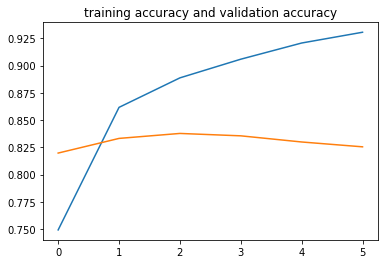

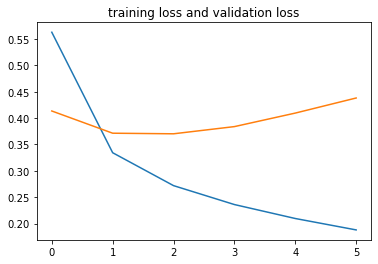

<Figure size 432x288 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt


loss= history.history['loss']
val_loss= history.history['val_loss']
acc= history.history['acc']
val_acc=history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training loss and validation loss')
plt.figure()

#overfitting happening as traning accuracy is much higher than val acc

## Sarcasm dataset

In [1]:
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'


In [4]:
json_file=[]
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    file=json_file.append(json.loads(line))

In [5]:
json_file[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [6]:
headline=[]
label=[]

for i in json_file:
    headline.append(i['headline'])
    label.append(i['is_sarcastic'])

In [7]:
headline[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [8]:
print(len(headline))

26709


In [12]:
split=int(len(headline)*0.7)
split

18696

In [15]:
train_sentences=headline[0:split]
train_label=label[0:split]

test_sentences=headline[split:]
test_labels=label[split:]

In [17]:
import numpy as np
train_sentences=np.array(train_sentences)
train_label=np.array(train_label)

test_sentences=np.array(test_sentences)
test_labels=np.array(test_labels)

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [90]:
tokenizer=Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index



In [91]:
sequences_test=tokenizer.texts_to_sequences(test_sentences)
pad_sequences_test=pad_sequences(sequences_test,
                           maxlen=150,
                           padding='post',
                           truncating='post')

In [92]:
sequences=tokenizer.texts_to_sequences(train_sentences)
pad_sequences=pad_sequences(sequences,
                           maxlen=150,
                           padding='post',
                           truncating='post')

In [93]:
print(len(pad_sequences))
print(len(train_label))
print()
print(len(pad_sequences_test))
print(len(test_labels))

18696
18696

8013
8013


<b><font color='red'> If getting ndarray error, run the test_sequence padding before the training as we did above</font></b>

In [94]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=150),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 16)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [95]:
history=model.fit(pad_sequences, train_label,
                 epochs=20,
                 validation_data=(pad_sequences_test, test_labels))

Epoch 1/20
585/585 [==============================] - 3s 4ms/step - loss: 0.6849 - acc: 0.5659 - val_loss: 0.6744 - val_acc: 0.5661
Epoch 2/20
585/585 [==============================] - 2s 3ms/step - loss: 0.6613 - acc: 0.5733 - val_loss: 0.5662 - val_acc: 0.7499
Epoch 3/20
585/585 [==============================] - 2s 3ms/step - loss: 0.5066 - acc: 0.8123 - val_loss: 0.4229 - val_acc: 0.8233
Epoch 4/20
585/585 [==============================] - 2s 3ms/step - loss: 0.3720 - acc: 0.8603 - val_loss: 0.3878 - val_acc: 0.8298
Epoch 5/20
585/585 [==============================] - 2s 3ms/step - loss: 0.3232 - acc: 0.8727 - val_loss: 0.3673 - val_acc: 0.8394
Epoch 6/20
585/585 [==============================] - 2s 3ms/step - loss: 0.2788 - acc: 0.8932 - val_loss: 0.3563 - val_acc: 0.8439
Epoch 7/20
585/585 [==============================] - 2s 3ms/step - loss: 0.2526 - acc: 0.9044 - val_loss: 0.3393 - val_acc: 0.8565
Epoch 8/20
585/585 [==============================] - 2s 3ms/step - loss: 0.

<Figure size 432x288 with 0 Axes>

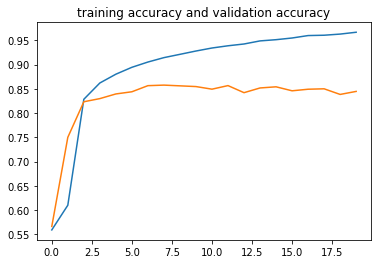

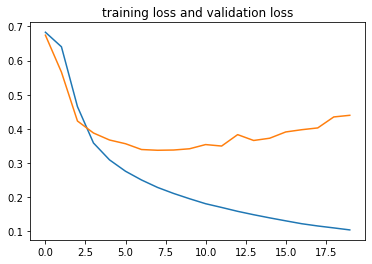

<Figure size 432x288 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt


loss= history.history['loss']
val_loss= history.history['val_loss']
acc= history.history['acc']
val_acc=history.history['val_acc']

epochs= range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training loss and validation loss')
plt.figure()

- For NLP we can better our model by optimizing the hyperparameters. <font color='red'>These are the primarly the <b>Embedding dimension, max_len of sentences and vocab_size</b>.</font> We can try reduce number of parameters to train if we are overfitting(reduce the vocab size and max_len)

### *<b><font color='red'> In cases of overfitment one key thing to do is reduce the number of trainable parameters present in the model and simplify the model</font>

In [100]:
##########FOR EXPORTING THE DATA TO VIEW WORDS with their vectors##########
#VISUALLY ON TENS. PROJECTOR#####

reverse_word_index= dict([(value, key) for (key,value) in word_index.items()])
embedding_layer= model.layers[0]
weights= embedding_layer.get_weights()[0]

import io

vec= io.open('vec_sarc2.tsv', 'w', encoding='utf-8')
word= io.open('word_sarc2.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    words= reverse_word_index[word_num]
    embeddings= weights[word_num]
    
    word.write(words+'\n')
    vec.write('\t'.join([str(x) for x in embeddings]) +'\n')
    
vec.close()
word.close()

## Pre-tokenized/ Sub-word tokenisation models


###### End of week 2 exercise
- Subword models are less accurate as the subwords do not have meaning by themselves when trying to classifiy sentiment; only when the subwords are put together with other subwords in the right order to they have meaning. <b>For them to be very effective we need to use RNN</b>

## BBC NLP Exercise
<b><font color='blue'>'Multiclassification problem with stopwords'</font> 

In [2]:
import csv
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [370]:
stopwords = [ "tv", "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [371]:
par=[]
catg=[]
with open ('bbc-text.csv', 'r') as f:
    file=csv.reader(f)
    next(file)
    for i in file:
        par.append(i[1])
        catg.append(i[0])
        

In [372]:
print(len(par))
print(len(catg))
#characters of original sentence
len(par[0])

2225
2225


In [374]:
paragraphs=[]
for i in par:    # take each sentence
    for word in stopwords: #replace all the stopwords presents iteratively in paragraph
        i=i.replace(' '+word+' ', ' ')
#     print(p)
    paragraphs.append(i)
### once sentence i has been fully remodified append it to a new list on the way out to the next sentence

#### Tips on <font color='red'>stopwords</font> for NLP
- When using stopwords keep an eye on the i=i.replace() as you have to make sure you iterating through every word in the stopwords on the same sentence. <b> <font color='red'>You have to refeed the first modified sentence BACK again for it to be modified again by the second word in stopwords.</b>

In [424]:
#modified sentence
print(len(paragraphs[0]))##cut  1300 characters
#we have 5 different categories
print(set(catg))

3093
{'entertainment', 'politics', 'tech', 'business', 'sport'}


In [378]:
print(len(paragraphs))
print(len(catg))
print()
split=0.7
split=int(len(paragraphs)*split)
print(split)

2225
2225

1557


In [385]:
train_par=paragraphs[0:split]
train_label=catg[0:split]

test_par=paragraphs[split:]
test_label=catg[split:]

In [389]:
train_par=np.array(train_par)
# train_label=np.array(train_label)

test_par=np.array(test_par)
# test_label=np.array(test_label)

In [390]:
tokenizer=Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_par)
word_index=tokenizer.word_index

In [391]:
sequences= tokenizer.texts_to_sequences(train_par)
padded_sequences=pad_sequences(sequences,
                              maxlen=300,
                              truncating='post',
                              padding='post')

In [392]:
sequences_test= tokenizer.texts_to_sequences(test_par)
padded_sequences_test=pad_sequences(sequences_test,
                              maxlen=300,
                              truncating='post',
                              padding='post')

In [393]:
set(train_label)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [382]:
train_label

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

In [394]:
#labels
tokenizer_l=Tokenizer()
tokenizer_l.fit_on_texts(train_label)
word_index_l=tokenizer.word_index

sequences_train_l=tokenizer_l.texts_to_sequences(train_label)
sequences_test_l=tokenizer_l.texts_to_sequences(test_label)

<b><font color='red'>- When working with <u>multiclassification problems</u> in NLP, make sure to tokenize (numerise) the word labels and put them into arrays.</font> In order to pass them onto  model.fit

In [397]:
sequences_train_l=np.array(sequences_train_l)
sequences_test_l=np.array(sequences_test_l)

In [412]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=300),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(6, activation='relu', activity_regularizer= regularizers.l2(0.01)),
    tf.keras.layers.Dense(6,activation='softmax')
    
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
             metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 16)           16000     
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 42        
Total params: 16,144
Trainable params: 16,144
Non-trainable params: 0
_________________________________________________________________


In [418]:
history=model.fit(padded_sequences, sequences_train_l,
                 epochs=150,
                 validation_data=(padded_sequences_test, sequences_test_l))

Epoch 1/150
49/49 [==============================] - 0s 6ms/step - loss: 0.9921 - acc: 0.7026 - val_loss: 0.9939 - val_acc: 0.6811
Epoch 2/150
49/49 [==============================] - 0s 3ms/step - loss: 0.9090 - acc: 0.7527 - val_loss: 0.9163 - val_acc: 0.7290
Epoch 3/150
49/49 [==============================] - 0s 4ms/step - loss: 0.8325 - acc: 0.8003 - val_loss: 0.8532 - val_acc: 0.7635
Epoch 4/150
49/49 [==============================] - 0s 3ms/step - loss: 0.7616 - acc: 0.8298 - val_loss: 0.7888 - val_acc: 0.8174
Epoch 5/150
49/49 [==============================] - 0s 3ms/step - loss: 0.6969 - acc: 0.8523 - val_loss: 0.7329 - val_acc: 0.8413
Epoch 6/150
49/49 [==============================] - 0s 3ms/step - loss: 0.6406 - acc: 0.8825 - val_loss: 0.6851 - val_acc: 0.8503
Epoch 7/150
49/49 [==============================] - ETA: 0s - loss: 0.5891 - acc: 0.898 - 0s 4ms/step - loss: 0.5884 - acc: 0.8992 - val_loss: 0.6454 - val_acc: 0.8563
Epoch 8/150
49/49 [==========================

Epoch 63/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0486 - acc: 0.9942 - val_loss: 0.3051 - val_acc: 0.9117
Epoch 64/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.9949 - val_loss: 0.3038 - val_acc: 0.9147
Epoch 65/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0452 - acc: 0.9955 - val_loss: 0.3073 - val_acc: 0.9117
Epoch 66/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0443 - acc: 0.9955 - val_loss: 0.3043 - val_acc: 0.9162
Epoch 67/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0425 - acc: 0.9961 - val_loss: 0.3046 - val_acc: 0.9147
Epoch 68/150
49/49 [==============================] - 0s 3ms/step - loss: 0.0409 - acc: 0.9961 - val_loss: 0.3047 - val_acc: 0.9147
Epoch 69/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0395 - acc: 0.9968 - val_loss: 0.3056 - val_acc: 0.9147
Epoch 70/150
49/49 [==============================] - 0s 4ms/step - loss: 0.

Epoch 125/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0077 - acc: 0.9994 - val_loss: 0.3618 - val_acc: 0.9162
Epoch 126/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0075 - acc: 0.9994 - val_loss: 0.3591 - val_acc: 0.9147
Epoch 127/150
49/49 [==============================] - 0s 3ms/step - loss: 0.0073 - acc: 0.9994 - val_loss: 0.3616 - val_acc: 0.9162
Epoch 128/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0071 - acc: 0.9994 - val_loss: 0.3633 - val_acc: 0.9162
Epoch 129/150
49/49 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 0.9994 - val_loss: 0.3634 - val_acc: 0.9177
Epoch 130/150
49/49 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 0.9994 - val_loss: 0.3658 - val_acc: 0.9162
Epoch 131/150
49/49 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 0.9994 - val_loss: 0.3645 - val_acc: 0.9177
Epoch 132/150
49/49 [==============================] - 0s 3ms/step - 

Text(0.5, 1.0, 'Training and validation loss')

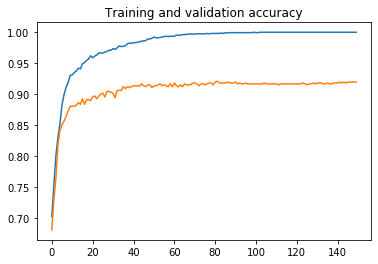

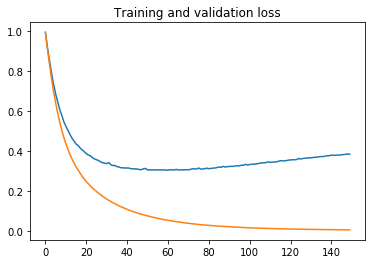

In [421]:
import matplotlib.pyplot as plt
#checkking for overfittment
acc= history.history['acc']
loss= history.history['loss']
val_loss= history.history['val_loss']
val_acc= history.history['val_acc']

x= range(len(acc))

plt.plot(x, acc)
plt.plot(x, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot(x, val_loss)
plt.plot(x, loss)
plt.title ('Training and validation loss'   )

In [422]:
##########FOR EXPORTING THE DATA TO VIEW WORDS with their vectors##########
#VISUALLY ON TENS. PROJECTOR#####

reverse_word_index= dict([(value, key) for (key,value) in word_index.items()])
embedding_layer= model.layers[0]
weights= embedding_layer.get_weights()[0]

import io

vec= io.open('vec_sarc3.tsv', 'w', encoding='utf-8')
word= io.open('word_sarc3.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    words= reverse_word_index[word_num]
    embeddings= weights[word_num]
    
    word.write(words+'\n')
    vec.write('\t'.join([str(x) for x in embeddings]) +'\n')
    
vec.close()
word.close()

### NLP with RNN
- When we used subwords, the model was not able to pick up the patterns as it was hard to capture the <b>meaning</b> of sentences with all the unique subwords for the model. Using RNN we can <b>preserve</b> the ordering of the subwords when finding patterns in sentences using subwords (Dense layer does not preserve order)
- <b><font color='red'>LSTM layers preserve context from timestamp to timestamp using Cell State, no matter how long the sentence</font></b><b> (the element of the first value is STILL present in the very last value)

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np


In [46]:

imdb = tfds.load("imdb_reviews/subwords8k", as_supervised=True)
imdb , info= tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

In [45]:
imdb ### without as supervised se to True (the structure below)

{'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [35]:
imdb ### with as supervised se to True (the structure below)

{'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

- <font color='red'>When loading tensors straight to a model for binary classification, <b>set as_supervised=True</b>.</font>. It will work much better than reloading tensor values into lists and then arrays to feed to the model.


In [47]:
train_data=imdb['train']
test_data=imdb['test']

In [48]:
train_data

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [49]:
tokenizer = info.features['text'].encoder
num_words=tokenizer.vocab_size
num_words

8185

In [38]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, t
                                           f.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

- <font color='red'><b>REALLY IMPORTANT to use the above code pad and buffer the tensor values</b></font>

In [52]:
#################################  MODEL1  ###############################

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 16), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(3,)),

    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
# model.summary()

In [60]:
#################################  MODEL2  ###############################
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 16),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

- <b>num_words need to be EQUAL to the number of sub word vocabulary

In [56]:
history=model.fit(train_dataset,
         epochs=10,
         validation_data=train_dataset)

Epoch 1/10
391/391 [==============================] - 481s 1s/step - loss: 0.1964 - acc: 0.9394 - val_loss: 0.1532 - val_acc: 0.9594
Epoch 2/10
391/391 [==============================] - 481s 1s/step - loss: 0.1849 - acc: 0.9417 - val_loss: 0.1403 - val_acc: 0.9640
Epoch 3/10
391/391 [==============================] - 481s 1s/step - loss: 0.1951 - acc: 0.9375 - val_loss: 0.3726 - val_acc: 0.8423
Epoch 4/10
391/391 [==============================] - 476s 1s/step - loss: 0.2427 - acc: 0.9115 - val_loss: 0.1478 - val_acc: 0.9582
Epoch 5/10
391/391 [==============================] - 481s 1s/step - loss: 0.1551 - acc: 0.9523 - val_loss: 0.1269 - val_acc: 0.9672
Epoch 6/10
391/391 [==============================] - 480s 1s/step - loss: 0.1419 - acc: 0.9588 - val_loss: 0.1118 - val_acc: 0.9718
Epoch 7/10
391/391 [==============================] - 479s 1s/step - loss: 0.1446 - acc: 0.9579 - val_loss: 0.1129 - val_acc: 0.9702
Epoch 8/10
391/391 [==============================] - 479s 1s/step - 

Text(0.5, 1.0, 'Training and validation loss')

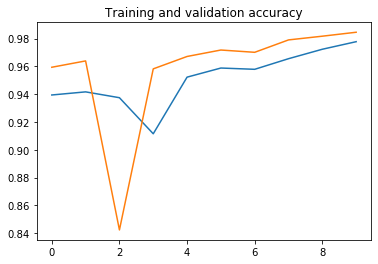

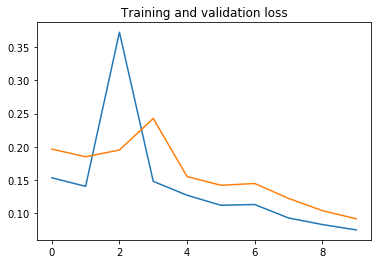

In [58]:
#checkking for overfittment
import matplotlib.pyplot as plt
acc= history.history['acc']
loss= history.history['loss']
val_loss= history.history['val_loss']
val_acc= history.history['val_acc']

x= range(len(acc))

plt.plot(x, acc)
plt.plot(x, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot(x, val_loss)
plt.plot(x, loss)
plt.title ('Training and validation loss'   )


In [61]:
######################## MODEL 2 ##########################################
####  Without LSTM only Conv1D
history=model.fit(train_dataset,
         epochs=10,
         validation_data=train_dataset)

Epoch 1/10
391/391 [==============================] - 88s 220ms/step - loss: 0.6270 - accuracy: 0.6152 - val_loss: 0.2848 - val_accuracy: 0.8871
Epoch 2/10
391/391 [==============================] - 88s 226ms/step - loss: 0.2789 - accuracy: 0.8870 - val_loss: 0.1540 - val_accuracy: 0.9514
Epoch 3/10
391/391 [==============================] - 88s 225ms/step - loss: 0.1626 - accuracy: 0.9429 - val_loss: 0.0763 - val_accuracy: 0.9834
Epoch 4/10
391/391 [==============================] - 95s 243ms/step - loss: 0.0819 - accuracy: 0.9789 - val_loss: 0.0361 - val_accuracy: 0.9939
Epoch 5/10
391/391 [==============================] - 93s 238ms/step - loss: 0.0376 - accuracy: 0.9929 - val_loss: 0.0131 - val_accuracy: 0.9991
Epoch 6/10
391/391 [==============================] - 95s 242ms/step - loss: 0.0114 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9998
Epoch 7/10
391/391 [==============================] - 89s 227ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.0024 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

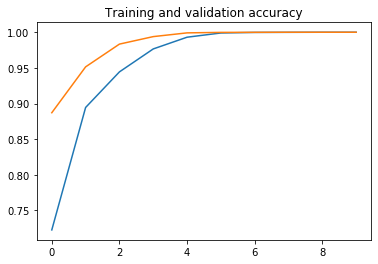

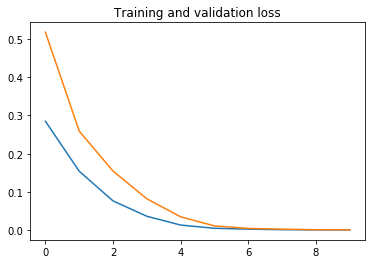

In [63]:
#checkking for overfittment
import matplotlib.pyplot as plt
acc= history.history['accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']
val_acc= history.history['val_accuracy']

x= range(len(acc))

plt.plot(x, acc)
plt.plot(x, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot(x, val_loss)
plt.plot(x, loss)
plt.title ('Training and validation loss'   )


###### *Sometimes Simple Convolution 1D networks may work better than LSTM

### NLP Generating text [simple]

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data= 'In the town of Athy one Jeremy Lanigan\nBattered away til he hadnt a pound.\nHis father he died and made him a man again\nLeft him a farm and ten acres of ground.\nHe gave a grand party to friends and relations\nWho didnt forget him when it comes to the will,\nIf youll but listen Ill make your eyes glisten\nOf the rows and the ructions of Lanigans Ball\nMyself to be sure got free invitation,\nFor all the nice girls and boys I might ask,\nAnd just in a minute both friends and relations\nWere dancing round merry as bees round a cask.\nJudy ODaly, that nice little milliner,\nShe tipped me a wink for to give her a call,\nAnd I soon arrived with Peggy McGilligan\nJust in time for Lanigans Ball.'
data

'In the town of Athy one Jeremy Lanigan\nBattered away til he hadnt a pound.\nHis father he died and made him a man again\nLeft him a farm and ten acres of ground.\nHe gave a grand party to friends and relations\nWho didnt forget him when it comes to the will,\nIf youll but listen Ill make your eyes glisten\nOf the rows and the ructions of Lanigans Ball\nMyself to be sure got free invitation,\nFor all the nice girls and boys I might ask,\nAnd just in a minute both friends and relations\nWere dancing round merry as bees round a cask.\nJudy ODaly, that nice little milliner,\nShe tipped me a wink for to give her a call,\nAnd I soon arrived with Peggy McGilligan\nJust in time for Lanigans Ball.'

In [38]:
sentences=data.split('\n')
sentences

['In the town of Athy one Jeremy Lanigan',
 'Battered away til he hadnt a pound.',
 'His father he died and made him a man again',
 'Left him a farm and ten acres of ground.',
 'He gave a grand party to friends and relations',
 'Who didnt forget him when it comes to the will,',
 'If youll but listen Ill make your eyes glisten',
 'Of the rows and the ructions of Lanigans Ball',
 'Myself to be sure got free invitation,',
 'For all the nice girls and boys I might ask,',
 'And just in a minute both friends and relations',
 'Were dancing round merry as bees round a cask.',
 'Judy ODaly, that nice little milliner,',
 'She tipped me a wink for to give her a call,',
 'And I soon arrived with Peggy McGilligan',
 'Just in time for Lanigans Ball.']

In [39]:
tokenizer=Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

print(len(word_index))

97


In [40]:
sequences=tokenizer.texts_to_sequences(sentences)


In [41]:
sequences

[[7, 4, 19, 5, 20, 21, 22, 23],
 [24, 25, 26, 8, 27, 2, 28],
 [29, 30, 8, 31, 3, 32, 9, 2, 33, 34],
 [35, 9, 2, 36, 3, 37, 38, 5, 39],
 [8, 40, 2, 41, 42, 6, 11, 3, 12],
 [43, 44, 45, 9, 46, 47, 48, 6, 4, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58],
 [5, 4, 59, 3, 4, 60, 5, 13, 14],
 [61, 6, 62, 63, 64, 65, 66],
 [10, 67, 4, 15, 68, 3, 69, 16, 70, 71],
 [3, 17, 7, 2, 72, 73, 11, 3, 12],
 [74, 75, 18, 76, 77, 78, 18, 2, 79],
 [80, 81, 82, 15, 83, 84],
 [85, 86, 87, 2, 88, 10, 6, 89, 90, 2, 91],
 [3, 16, 92, 93, 94, 95, 96],
 [17, 7, 97, 10, 13, 14]]

In [42]:
############# build up each indiviual list from 2 words onwards ###########

input_sequence=[]
for i in sequences:
    line=i
    for j in range(1,len(line)):
        input_sequence.append(line[0:j+1])

In [43]:
input_sequence

[[7, 4],
 [7, 4, 19],
 [7, 4, 19, 5],
 [7, 4, 19, 5, 20],
 [7, 4, 19, 5, 20, 21],
 [7, 4, 19, 5, 20, 21, 22],
 [7, 4, 19, 5, 20, 21, 22, 23],
 [24, 25],
 [24, 25, 26],
 [24, 25, 26, 8],
 [24, 25, 26, 8, 27],
 [24, 25, 26, 8, 27, 2],
 [24, 25, 26, 8, 27, 2, 28],
 [29, 30],
 [29, 30, 8],
 [29, 30, 8, 31],
 [29, 30, 8, 31, 3],
 [29, 30, 8, 31, 3, 32],
 [29, 30, 8, 31, 3, 32, 9],
 [29, 30, 8, 31, 3, 32, 9, 2],
 [29, 30, 8, 31, 3, 32, 9, 2, 33],
 [29, 30, 8, 31, 3, 32, 9, 2, 33, 34],
 [35, 9],
 [35, 9, 2],
 [35, 9, 2, 36],
 [35, 9, 2, 36, 3],
 [35, 9, 2, 36, 3, 37],
 [35, 9, 2, 36, 3, 37, 38],
 [35, 9, 2, 36, 3, 37, 38, 5],
 [35, 9, 2, 36, 3, 37, 38, 5, 39],
 [8, 40],
 [8, 40, 2],
 [8, 40, 2, 41],
 [8, 40, 2, 41, 42],
 [8, 40, 2, 41, 42, 6],
 [8, 40, 2, 41, 42, 6, 11],
 [8, 40, 2, 41, 42, 6, 11, 3],
 [8, 40, 2, 41, 42, 6, 11, 3, 12],
 [43, 44],
 [43, 44, 45],
 [43, 44, 45, 9],
 [43, 44, 45, 9, 46],
 [43, 44, 45, 9, 46, 47],
 [43, 44, 45, 9, 46, 47, 48],
 [43, 44, 45, 9, 46, 47, 48, 6],
 [43

In [10]:
sentence_length=max([len(i) for i in input_sequence])
sentence_length

11

In [11]:
padded_sequences=pad_sequences(input_sequence)

In [12]:
padded_sequences

array([[ 0,  0,  0, ...,  0,  6,  3],
       [ 0,  0,  0, ...,  6,  3, 18],
       [ 0,  0,  0, ...,  3, 18,  4],
       ...,
       [ 0,  0,  0, ...,  6, 96,  9],
       [ 0,  0,  0, ..., 96,  9, 12],
       [ 0,  0,  0, ...,  9, 12, 13]])

In [13]:
xs=padded_sequences[:,:-1] #fetch all the rows besides the last number
ys=padded_sequences[:,-1]  ##fetch all the rows very last number

In [14]:
ys

array([ 3, 18,  4, 19, 20, 21, 22, 24, 25,  7, 26,  1, 27, 29,  7, 30,  2,
       31,  8,  1, 32, 33,  8,  1, 35,  2, 36, 37,  4, 38, 39,  1, 40, 41,
        5, 10,  2, 11, 43, 44,  8, 45, 46, 47,  5,  3, 48, 50, 51, 52, 53,
       54, 55, 56, 57,  3, 58,  2,  3, 59,  4, 12, 13,  5, 61, 62, 63, 64,
       65, 66,  3, 14, 67,  2, 68, 15, 69, 70, 16,  6,  1, 71, 72, 10,  2,
       11, 74, 17, 75, 76, 77, 17,  1, 78, 80, 81, 14, 82, 83, 85, 86,  1,
       87,  9,  5, 88, 89,  1, 90, 15, 91, 92, 93, 94, 95,  6, 96,  9, 12,
       13])

In [24]:
######## one how encoding our word_index and corresponding y values #######
import keras
labels= keras.utils.to_categorical(ys, num_classes=96+1)
labels[0]

Using TensorFlow backend.


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [26]:
model = Sequential()
# 64 dimensions
model.add(Embedding(97, 150, input_length=10)) 
model.add(Bidirectional(LSTM(20)))
model.add(Dense(97, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 150)           14550     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                27360     
_________________________________________________________________
dense_1 (Dense)              (None, 97)                3977      
Total params: 45,887
Trainable params: 45,887
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, labels, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 3s 7ms/step - loss: 4.5750 - accuracy: 0.0202
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5632 - accuracy: 0.0883
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5520 - accuracy: 0.0788
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 4.5396 - accuracy: 0.0590
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5236 - accuracy: 0.0496
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 4.5111 - accuracy: 0.0673
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 4.4884 - accuracy: 0.0735
Epoch 8/500
4/4 [==============================] - 0s 7ms/step - loss: 4.4560 - accuracy: 0.0715
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 4.4376 - accuracy: 0.0517
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 4.3866 - accuracy: 0.0621
Epoch 11/500
4/4 [===========

4/4 [==============================] - 0s 6ms/step - loss: 0.3491 - accuracy: 0.9915
Epoch 168/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.9915
Epoch 169/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3318 - accuracy: 0.9852
Epoch 170/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.9915
Epoch 171/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3247 - accuracy: 0.9967
Epoch 172/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.9967
Epoch 173/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.9852
Epoch 174/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3111 - accuracy: 0.9915
Epoch 175/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.9967
Epoch 176/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.9967
Epoch 177/500
4/4 [=====

4/4 [==============================] - 0s 6ms/step - loss: 0.0770 - accuracy: 0.9967
Epoch 332/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0823 - accuracy: 0.9915
Epoch 333/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0899 - accuracy: 0.9852
Epoch 334/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0825 - accuracy: 0.9967
Epoch 335/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9852
Epoch 336/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9798
Epoch 337/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9915
Epoch 338/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0821 - accuracy: 0.9915
Epoch 339/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0865 - accuracy: 0.9798
Epoch 340/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0861 - accuracy: 0.9915
Epoch 341/500
4/4 [=====

4/4 [==============================] - 0s 6ms/step - loss: 0.0403 - accuracy: 0.9915
Epoch 496/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0420 - accuracy: 0.9915
Epoch 497/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0465 - accuracy: 0.9915
Epoch 498/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 499/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0371 - accuracy: 0.9915
Epoch 500/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.9967


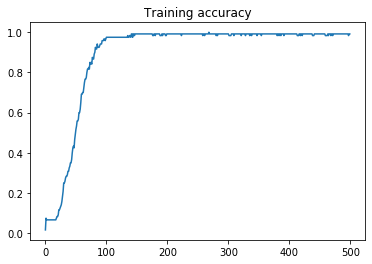

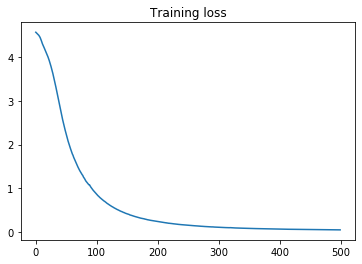

In [29]:
#checkking for overfittment
import matplotlib.pyplot as plt
acc= history.history['accuracy']
loss= history.history['loss']


x= range(len(acc))

plt.plot(x, acc)
plt.title ('Training accuracy')
plt.figure()
plt.title ('Training loss')
plt.plot(x, loss)




#### Generating new text

In [58]:
seed_text = "Laurence went to dublin"
next_words = 100

In [51]:
# for word, index in tokenizer.word_index.items():
#     print(word, index)

<OOV> 1
a 2
and 3
the 4
of 5
to 6
in 7
he 8
him 9
for 10
friends 11
relations 12
lanigans 13
ball 14
nice 15
i 16
just 17
round 18
town 19
athy 20
one 21
jeremy 22
lanigan 23
battered 24
away 25
til 26
hadnt 27
pound 28
his 29
father 30
died 31
made 32
man 33
again 34
left 35
farm 36
ten 37
acres 38
ground 39
gave 40
grand 41
party 42
who 43
didnt 44
forget 45
when 46
it 47
comes 48
will 49
if 50
youll 51
but 52
listen 53
ill 54
make 55
your 56
eyes 57
glisten 58
rows 59
ructions 60
myself 61
be 62
sure 63
got 64
free 65
invitation 66
all 67
girls 68
boys 69
might 70
ask 71
minute 72
both 73
were 74
dancing 75
merry 76
as 77
bees 78
cask 79
judy 80
odaly 81
that 82
little 83
milliner 84
she 85
tipped 86
me 87
wink 88
give 89
her 90
call 91
soon 92
arrived 93
with 94
peggy 95
mcgilligan 96
time 97


In [62]:
for i in range(next_words):
    sequence_list=tokenizer.texts_to_sequences([seed_text])
    padded_list=pad_sequences(sequence_list,
                              padding='pre',
                             maxlen=11)
    print(padded_list)

[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 0 0 1 1 6 1]]
[[0 0 0 0 0 

In [67]:
for i in range(next_words):
    sequence_list=tokenizer.texts_to_sequences([seed_text])
    padded_list=pad_sequences(sequence_list,
                              padding='pre',
                             maxlen=11)
    
    predicted= model.predict_classes(padded_list, verbose=0)
    
    output_word=''
    
    for word, index in tokenizer.word_index.items():
        if index== predicted:
            output_word=word
            break
            
    seed_text+=' '+ output_word

print(seed_text)


c:\users\a\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin the relations lanigans lanigans lanigans lanigans lanigans lanigans lanigans lanigans lanigans lanigans hadnt <OOV> hadnt peggy peggy peggy acres acres might girls nice boys might might might might might might might odaly little a died he <OOV> made man man man man man man man man man man might odaly ball a friends made man boys might girls might might might might girls nice boys might might might might might might might odaly little a died he <OOV> made man man man man man man man man man man might odaly ball a friends made man boys might girls might might might might girls nice boys might might might might might might might odaly little a died he <OOV> made man man man man man man man man man man might odaly ball a friends made man boys might girls might might might might girls nice boys might might might might might might might odaly little a died he <OOV> made man man man man man man man man man man might odaly ball a friends made man boys might girls might 

- Its important to note that the next word is predicted through <b>probability and NOT by determinism. </b>

- as we go further into the text we can see we get more repetitions of words as the <b>range of probability decreases as we go further out</b>.
- <b>For example, if a specific word like 'bread' has 5% chance of coming next then the following potential words that come after it are reduced significantly as there are not many examples of words that follow after bread.
    
# Scalling NLP text generating models
    
<b><font color='purple'>
- As we start to deal with very large word datasets, we will run out of problems as our output Dense node will be in the millions which can create a bottleneck.
- <font color='blue'>As a result we will be training our model based on individual characters and predict the next word using the fixed size of the number of characters
- <font color='red'> For example an input sequence of 'Hell' of length four, its output sequence will be of length 4 'ello';
    

In [22]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional


In [23]:
file=[]
text= open('shakespeare.txt', 'r').read().lower()
text

"first citizen:\nbefore we proceed any further, hear me speak.\n\nall:\nspeak, speak.\n\nfirst citizen:\nyou are all resolved rather to die than to famish?\n\nall:\nresolved. resolved.\n\nfirst citizen:\nfirst, you know caius marcius is chief enemy to the people.\n\nall:\nwe know't, we know't.\n\nfirst citizen:\nlet us kill him, and we'll have corn at our own price.\nis't a verdict?\n\nall:\nno more talking on't; let it be done: away, away!\n\nsecond citizen:\none word, good citizens.\n\nfirst citizen:\nwe are accounted poor citizens, the patricians good.\nwhat authority surfeits on would relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance is a gain to them let us revenge this with\nour pikes, ere we become rakes: for the gods know i\nspeak this in hunger 

In [24]:
print('original_length',len(text))
text=text[0:100000] #we will only focus on the first 100,000 characters


original_length 1115394


In [25]:
#all the characters found in text
characters=set(text)
characters

{'\n',
 ' ',
 '!',
 '&',
 "'",
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [26]:
#creating a word_index to dictionary
char_to_numerical= dict((n,c) for c,n in enumerate(characters))
numerical_to_chars= dict((c,n) for c,n in enumerate(characters))

- <font color='red'>  To add a new index to a list we are iterating for we <u>MUST</u> to use <b>enumerate()

In [27]:
char_to_numerical

{'q': 0,
 's': 1,
 'v': 2,
 'i': 3,
 'c': 4,
 'y': 5,
 '?': 6,
 "'": 7,
 ':': 8,
 'z': 9,
 'o': 10,
 ' ': 11,
 'g': 12,
 'n': 13,
 '.': 14,
 'j': 15,
 '!': 16,
 ',': 17,
 '-': 18,
 ';': 19,
 'f': 20,
 't': 21,
 'h': 22,
 'd': 23,
 'b': 24,
 'e': 25,
 'm': 26,
 'l': 27,
 'p': 28,
 'x': 29,
 'a': 30,
 '\n': 31,
 'w': 32,
 'u': 33,
 'k': 34,
 '&': 35,
 'r': 36}

In [28]:
numerical_to_chars

{0: 'q',
 1: 's',
 2: 'v',
 3: 'i',
 4: 'c',
 5: 'y',
 6: '?',
 7: "'",
 8: ':',
 9: 'z',
 10: 'o',
 11: ' ',
 12: 'g',
 13: 'n',
 14: '.',
 15: 'j',
 16: '!',
 17: ',',
 18: '-',
 19: ';',
 20: 'f',
 21: 't',
 22: 'h',
 23: 'd',
 24: 'b',
 25: 'e',
 26: 'm',
 27: 'l',
 28: 'p',
 29: 'x',
 30: 'a',
 31: '\n',
 32: 'w',
 33: 'u',
 34: 'k',
 35: '&',
 36: 'r'}

In [29]:
seq_length=40
step_size=3 # how much we shift down by

sentences=[]
next_character=[]

for i in range(0, len(text)-seq_length, step_size):
    # appending 40 charcters at a time, moving across by 3 untill reaching the end f text
    sentences.append(text[i:i+seq_length])
    #appends the 41st character as keep moving across the text by 3
    next_character.append(text[i+seq_length])

- We are using i as a helper to identify sections of text hence we use <b>range</b> instead of <u> enumerate.</u>
- enumerate is used for <b>loop indexing

In [30]:
print(len(sentences))
print(seq_length)
print(len(characters))

33320
40
37


In [31]:
print(text[0:59])
print()
print(sentences[0])
print(next_character[0])
print()
print(text[40])

first citizen:
before we proceed any further, hear me speak

first citizen:
before we proceed any fur
t

t


- goal is to seperate the xs and ys as we have done above. 
- The sentence length of 40 is arbitrary 
- We have chosen a step_size of 3 to reduce the total number of examples, and it is by how much we shift down each time we create the next 40 character sentence

In [44]:
# creating a 3D cube of zeros
#total number of sentences x length of each sentence x total number of characters
x=np.zeros((len(sentences), seq_length, len(characters)), dtype=np.bool)

#creating a 2D of zeros
#total number of sentences x length of sentences
y= np.zeros((len(sentences),len(characters)), dtype=np.bool)

In [45]:
print(33320 * 40 * 37)
print((len(sentences))*len(characters))

49313600
1232840


- The dimensions of the first 3D cube is 33,320 x 40 x 37. Which means there are 49,313,600 possible binary units.
- And for the ys we have 1,232,840 possible binary units
- <font color='red'> <b>The goal is to capture/represent the text data in boolean format in those cubes. Both for the x and y

### The critical  'for loop'
1) Populating the x and y cubes with our seperate text data<br>
2) We will turn the zeros to 1s wherever a character correspons in a given 40 character sentence sequence.<br>
3) We will do the same in capturing the ys (next characters for a given sequence)

In [47]:
for sen_number, sentence in enumerate(sentences):
    for ch_number, character in enumerate(sentence):
        x[sen_number,ch_number, char_to_numerical[character]]=1 #once this loop for the whole sentence finishes 
    y[sen_number,char_to_numerical[next_character[sen_number]]]=1 # change the next character matrix cube thereafter
       
# locating the thing to change

# i ==> 1st 40 character sentence
# t ==> looping through the characters present in sentence and setting the
# corresponding charcters in cube from zero to 1

 x[index,t char_to_numerical[character]]==1<br><b>
 <b>e.g cube x ==> 1st sentence sequence, 1st character from sentence, get the corresponding numerical character for the charcter == and set to 1<br></b>
 e.g ==> [1,1,35] set to 1

In [48]:
char_to_numerical['b']

24

In [49]:
print(x[0])
print()
print(y[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]]

[False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False]


#### The LSTM Model
- For this character based model we need to use an LSTM model as its able to capture the context in its cell state

In [50]:
x.shape

(33320, 40, 37)

In [71]:
# model= tf.keras.Sequential([
#     tf.keras.layers.LSTM(224, activation='relu',input_shape=(seq_length,len(characters)), return_sequences=True),
#     tf.keras.layers.LSTM(60, activation='relu'),
#     tf.keras.layers.Dense(30, activation='relu'),
#     tf.keras.layers.Dense(len(characters), activation='softmax')

# ])
# model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 40, 224)           234752    
_________________________________________________________________
lstm_25 (LSTM)               (None, 60)                68400     
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_21 (Dense)             (None, 37)                1147      
Total params: 306,129
Trainable params: 306,129
Non-trainable params: 0
_________________________________________________________________


In [84]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv1D(124, 5, activation='relu',input_shape=(seq_length,len(characters))),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(165, activation='relu'),
#     tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(characters), activation='softmax')

])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 36, 124)           23064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 124)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 165)               191400    
_________________________________________________________________
dense_29 (Dense)             (None, 37)                6142      
Total params: 220,606
Trainable params: 220,606
Non-trainable params: 0
_________________________________________________________________


<b><font color='red'>- Make sure to use <u>categorical crossentropy</u> for character based NLP text generation</font></b>
- Also, notice we do not use an embedding layer here as we are not dealing with words but characters
- <b><font color='red'>Conv1D layer acctentuates the key features and can helps us speed up our model training
 

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history=model.fit(x, y, batch_size=256, epochs=50)


Epoch 1/50
131/131 [==============================] - 12s 81ms/step - loss: 3.1802 - acc: 0.1409
Epoch 2/50
131/131 [==============================] - 10s 79ms/step - loss: 3.0254 - acc: 0.1531
Epoch 3/50
131/131 [==============================] - 10s 80ms/step - loss: 2.7902 - acc: 0.2269
Epoch 4/50
131/131 [==============================] - 11s 81ms/step - loss: 2.4961 - acc: 0.3084
Epoch 5/50
131/131 [==============================] - 11s 80ms/step - loss: 2.3289 - acc: 0.3505
Epoch 6/50
131/131 [==============================] - 10s 80ms/step - loss: 2.2457 - acc: 0.3670
Epoch 7/50
131/131 [==============================] - 11s 81ms/step - loss: 2.1463 - acc: 0.3939
Epoch 8/50
131/131 [==============================] - 11s 81ms/step - loss: 2.0916 - acc: 0.4028
Epoch 9/50
131/131 [==============================] - 11s 81ms/step - loss: 2.0280 - acc: 0.4177
Epoch 10/50
131/131 [==============================] - 11s 82ms/step - loss: 1.9886 - acc: 0.4311
Epoch 11/50
131/131 [========

<Figure size 432x288 with 0 Axes>

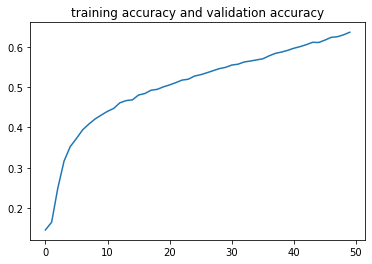

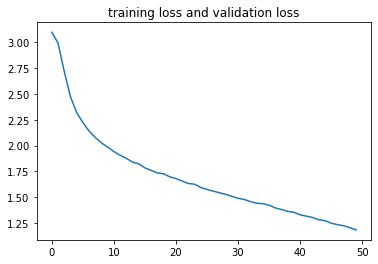

<Figure size 432x288 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt


loss= history.history['loss']
acc= history.history['acc']

epochs= range(len(acc))

plt.plot(epochs,acc)

plt.title('training accuracy and validation accuracy')
plt.figure()

plt.plot(epochs,loss)

plt.title('training loss and validation loss')
plt.figure()


# Sequence and Time series
### Goal is to predict next series data  given the <b> trend, seasonality, autocorrelation and noise</b>
- Multivariet timeseries data helps us understand the impacts of related data (e.g co2 emissions and rise in global temperature)
<br>
- We can also <b>impute</b> (in reverse direction) trend data to give indication how we came to be in the current trend, we can also use to <b>fill in gaps</b> in missing data and  in detect anomolies in data.


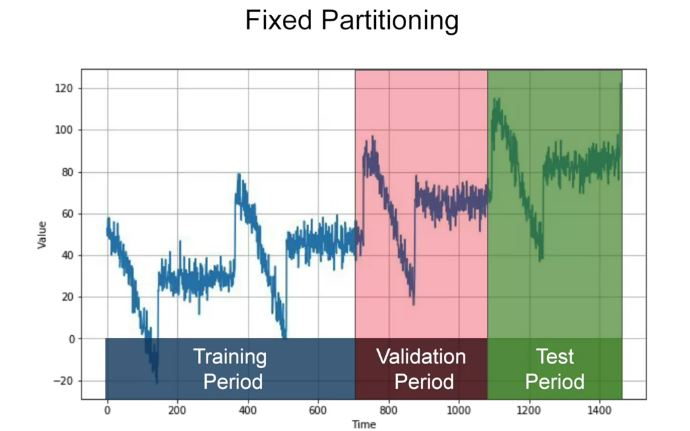

In [4]:
Image('train_test_validation.jpg')

- <b> When training on time series data, we need to make sure that the tradining data has<font color='red'> a balanced seasonality</font> (making sure december data is represented as much as January)

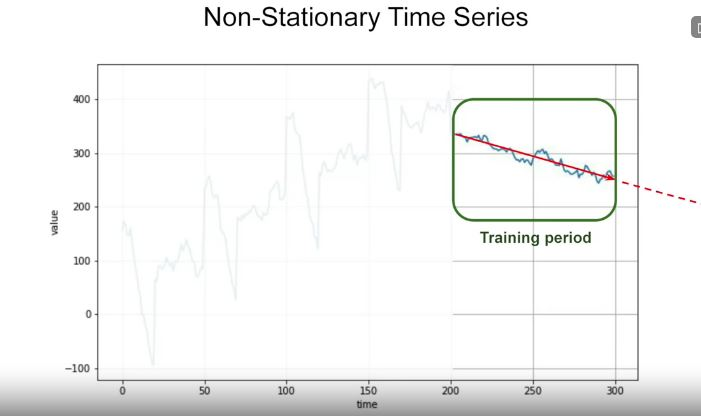

In [3]:
from IPython.display import Image
Image('non-stationary.jpg')

- Sometimes <b>big events</b> such as scandales and tech breakthroughs can change the data patterns
- To solve these pattern problems we need re-train from the last 100 steps

##### Measuring error
- <b>Mean Absolute Error (MAE) does penelises errors uniformly whereas Mean squared error (MSE) penelises large errors even more.

### Naive Forecast vs Moving average 

- The naive forecast predicts next values by simply taking the immidiate  previous last value
- Moving Average predicts the next value by taking the average of the previous 30 values

When we calculate the erro for both methods the Naive forecast has less error.

### Differencing 

- We can use differencing to predict the next value. We simply work out the difference between two values (fixed timestep value [e.g 365th]) across all the data. 
- This will remove the trend and seasonality
- We the work out the centered moving average ( taking two consecutive values and averaging the out iteratively through the whole dataset - we will end up with 1 datapoint short in the centered MA)
- Now we can add back the values we initially took away using the fixed timestep to the Centered MA (for better results we can also center average the values we took away)
- Differencing method is tends to be more accurate than the Naive forecast

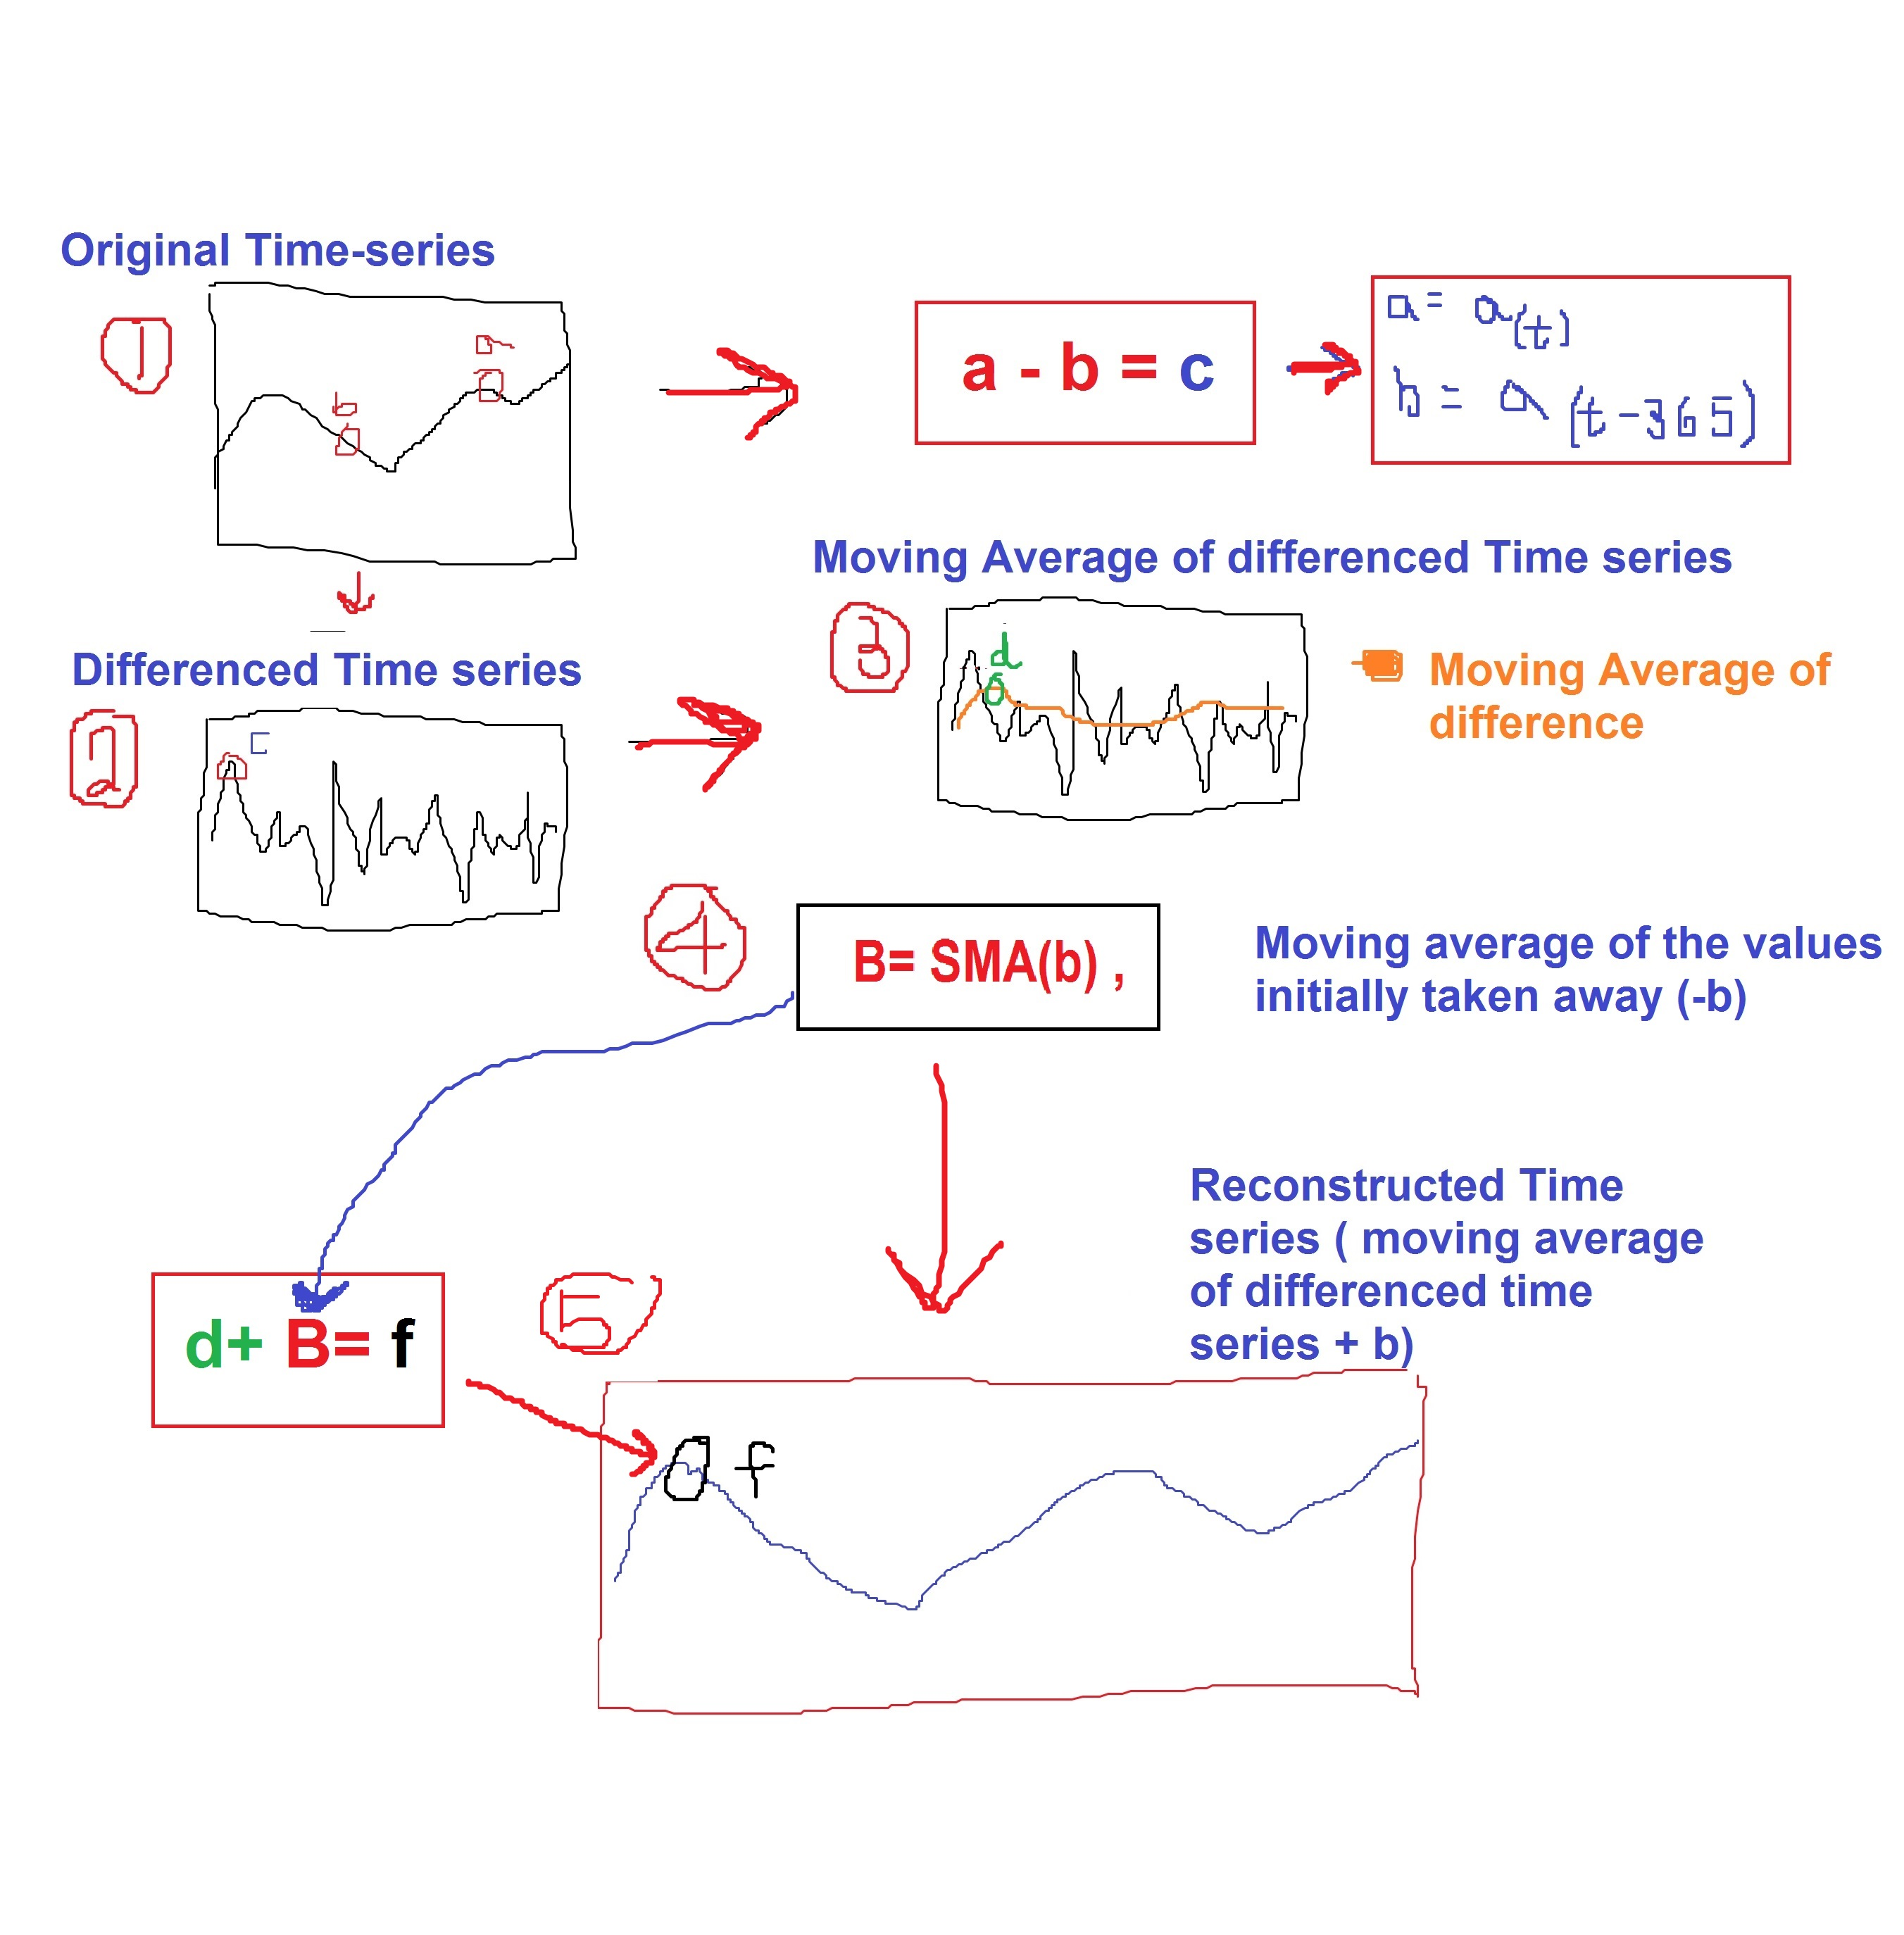

In [1]:
from IPython.display import Image
Image('forecasted_time_series.jpg')

#### How to use differencing to create abetter forecast

1) We calculated the difference between 2 points in the series (e.g fixed gap 365) throughout the whole series<br>
2) We calculated the centered moving average of the series<br>
3) We added back b; but also made sure to smooth its series values<br>
4) Finally we compared it to the actual values to see the error<br>

###### ******Differencing with Moving averages has less error than SMA and Naive forecast**

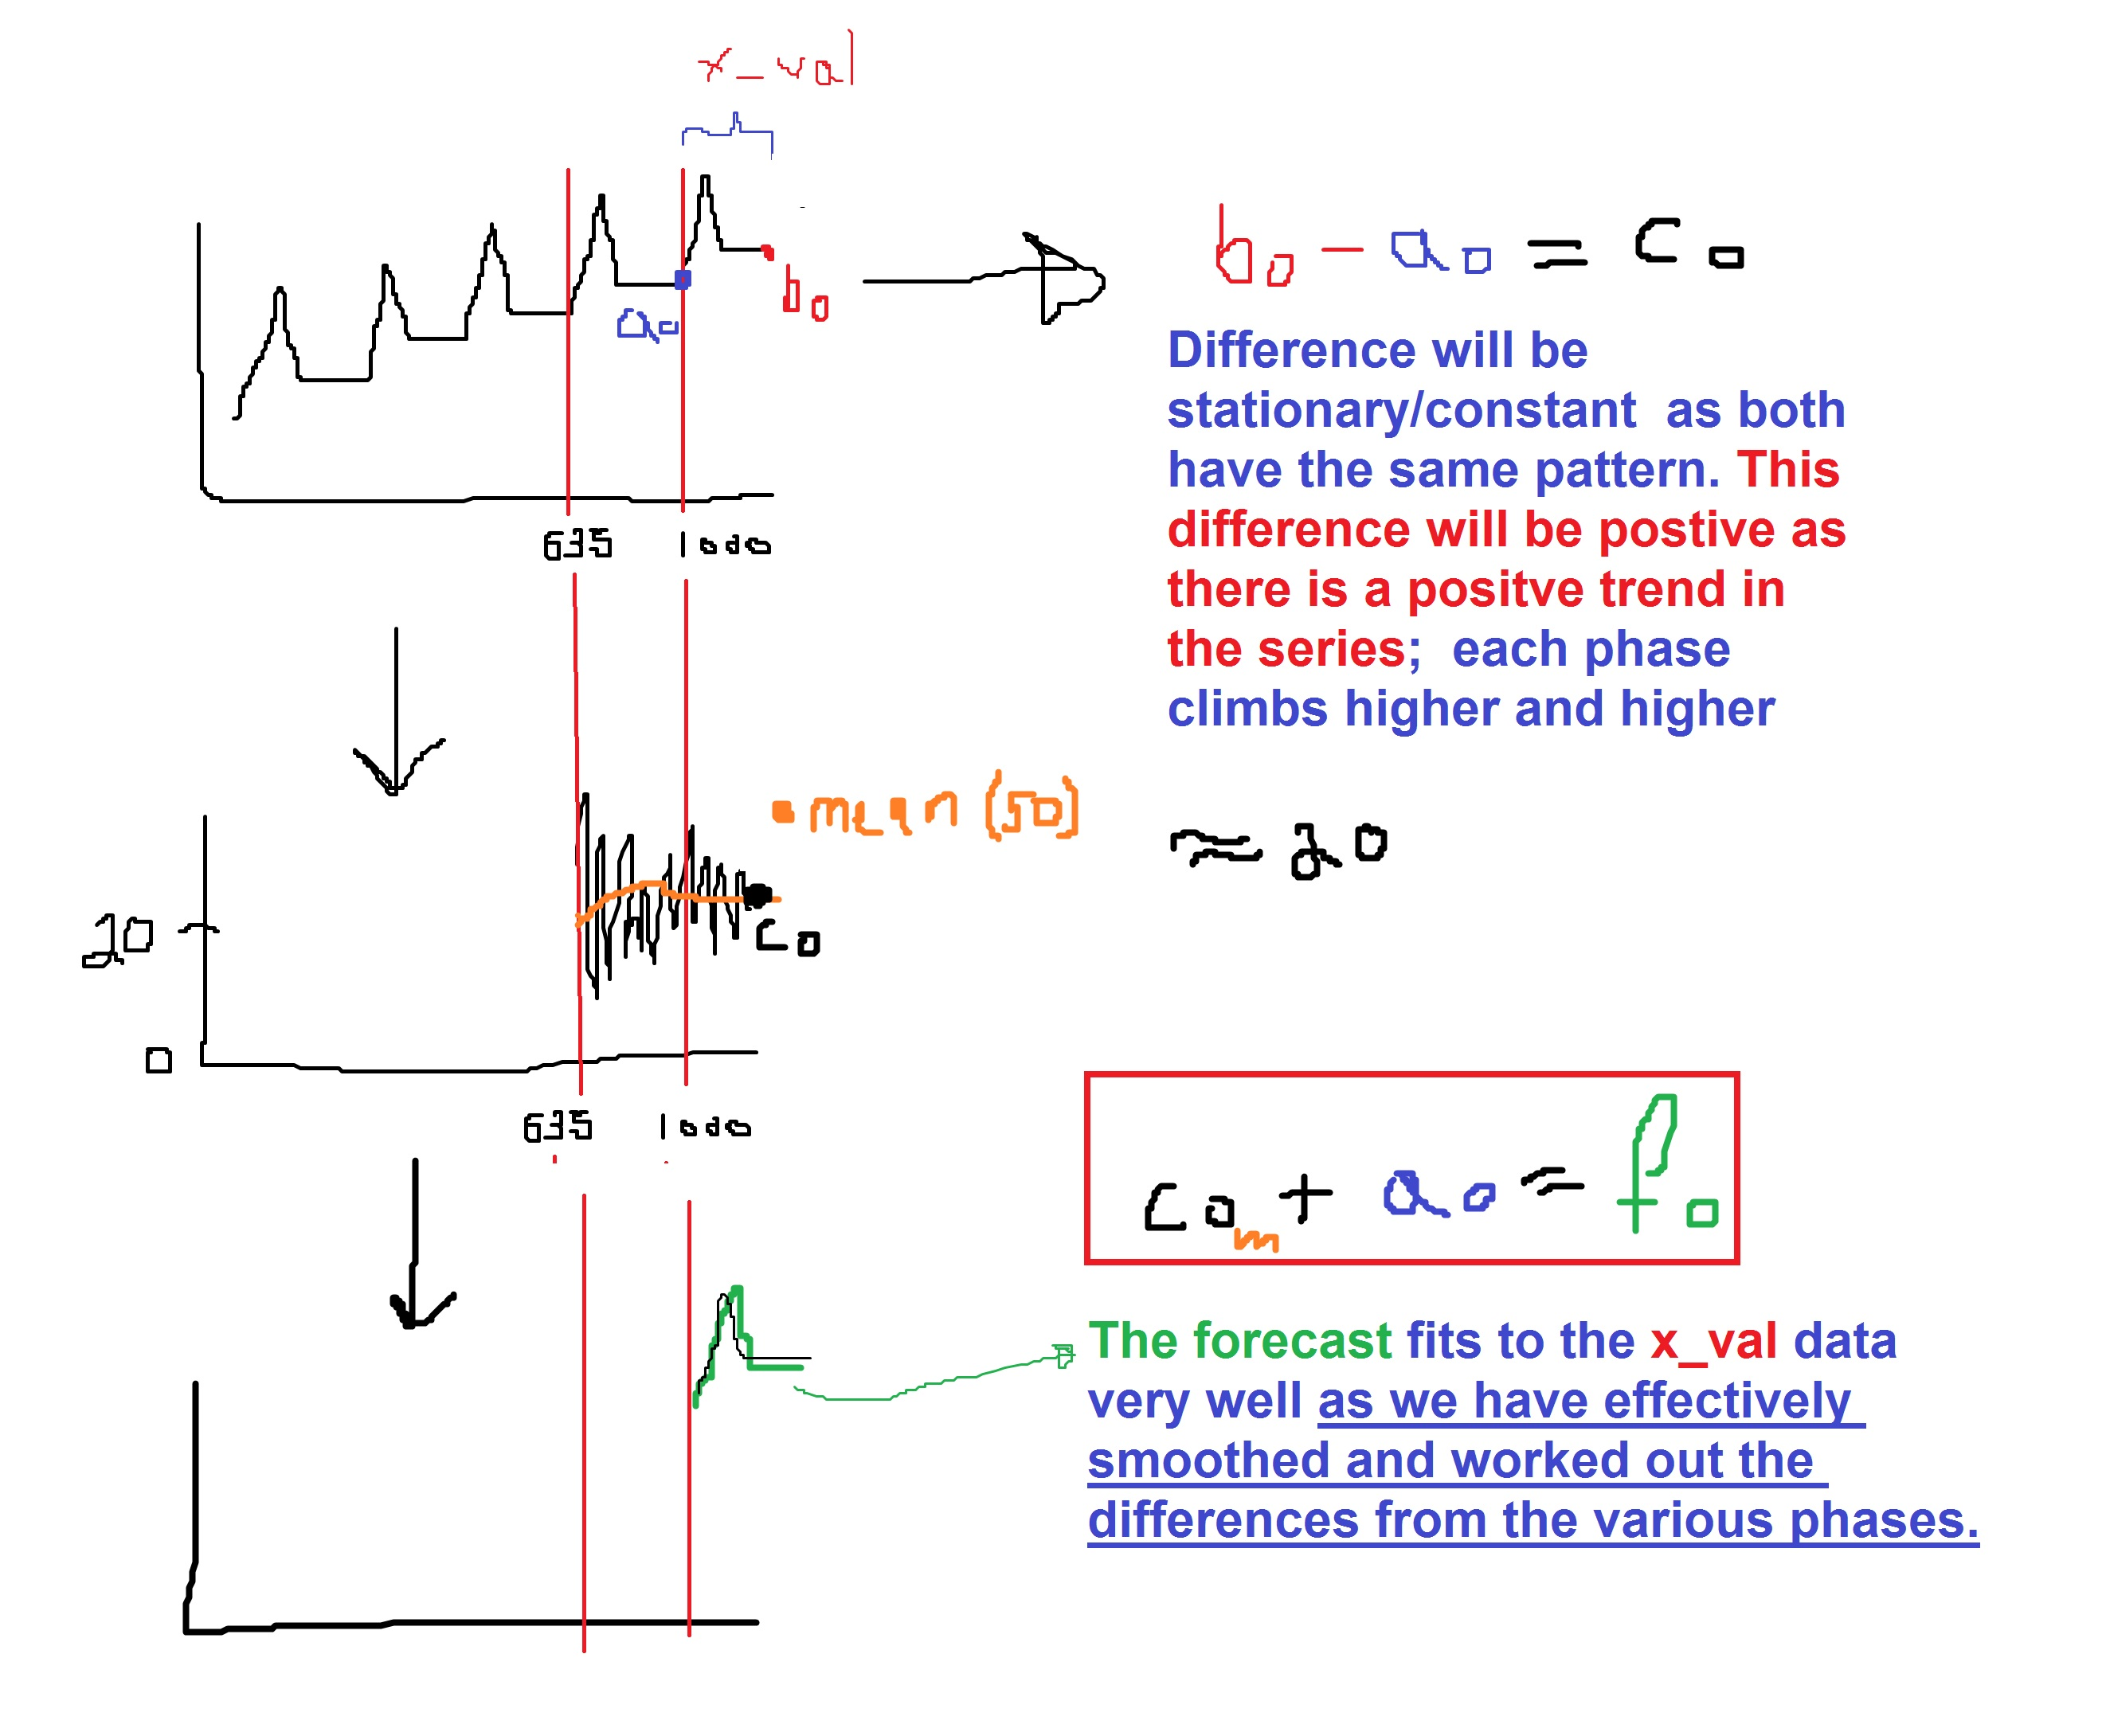

In [3]:
Image('the_forecast.jpg')

### Week 1 Exercise

In [2]:
import tensorflow as tf

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

<Figure size 1000x600 with 1 Axes>

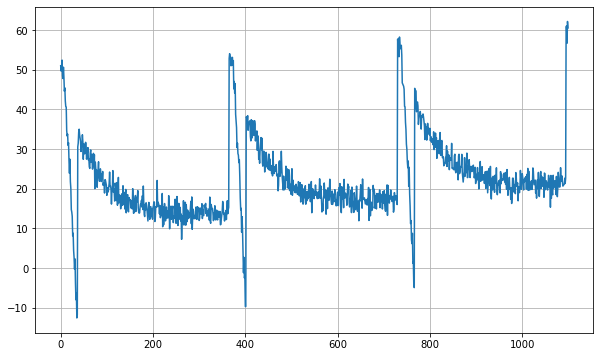

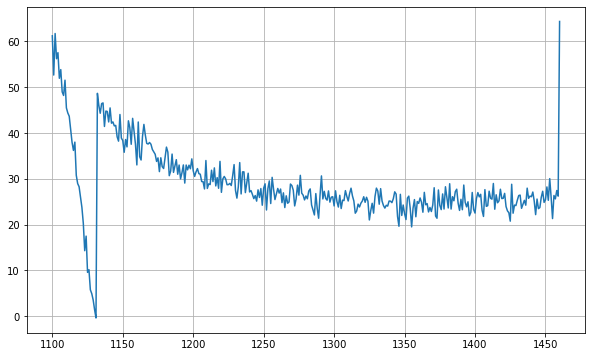

In [4]:
split_time=1100

time_train=time[:split_time]
series_train=series[:split_time]

time_test=time[split_time:]
series_test=series[split_time:]

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(time_train, series_train)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(time_test, series_test)

### Naive Forecast

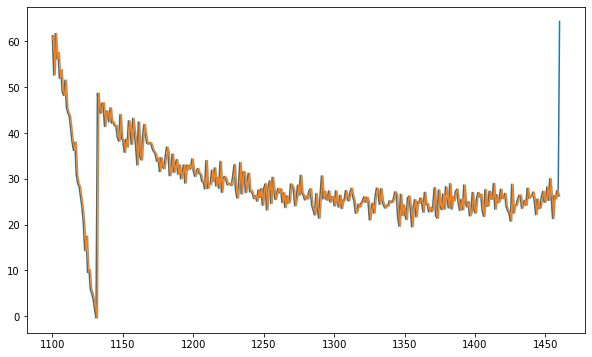

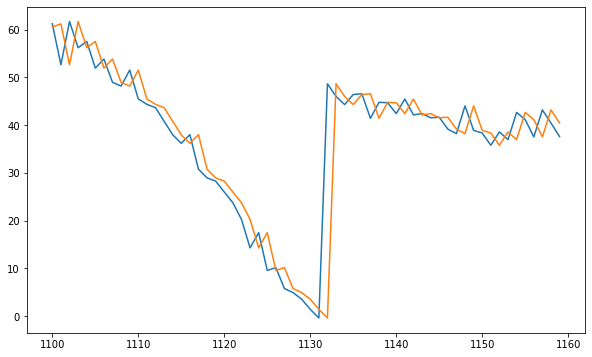

In [5]:
naive_forecast=series[split_time-1:-1]

plt.figure(figsize=(10,6))
plt.plot(time_test, series_test)
plt.plot(time_test, naive_forecast)

plt.figure(figsize=(10,6))
plt.plot(time_test[:60], series_test[:60])
plt.plot(time_test[:60], naive_forecast[:60])

In [7]:

print(keras.metrics.mean_absolute_error(series_test, naive_forecast))
print(keras.metrics.mean_squared_error(series_test, naive_forecast))

tf.Tensor(2.6011968, shape=(), dtype=float32)
tf.Tensor(19.578304, shape=(), dtype=float32)


In [10]:
def moving_average(series, window_size):
    forecast=[]
    
    for time in range(0,len(series)-window_size):
        forecast.append(series[time:time+window_size].mean())
        
    return np.array(forecast)

##### 30 SMA

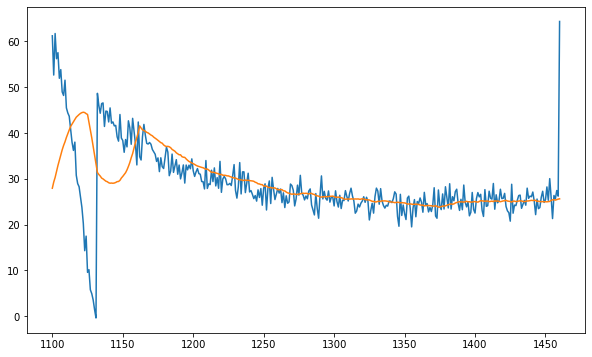

In [11]:
moving_avg= moving_average(series, 30)[1100-30:]#to make sure it has same amount of value as series_test

plt.figure(figsize=(10,6))
plt.plot(time_test, series_test)
plt.plot(time_test, moving_avg)

In [12]:
print(keras.metrics.mean_absolute_error(series_test, moving_avg))
print(keras.metrics.mean_squared_error(series_test, moving_avg))

tf.Tensor(4.3040023, shape=(), dtype=float32)
tf.Tensor(65.786224, shape=(), dtype=float32)


#### Differencing

In [17]:
len(series)


1461

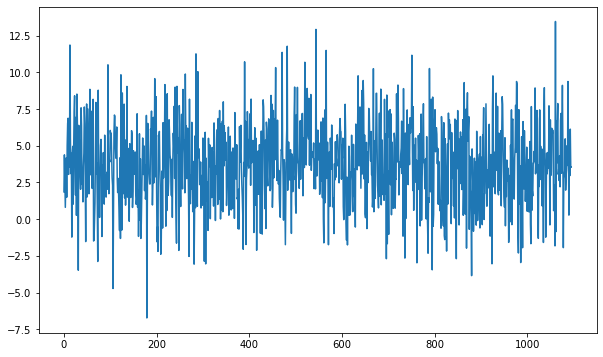

In [16]:
diff_series=series[365:]-series[:-365]

time0=range(0,len(diff_series))

plt.figure(figsize=(10,6))
plt.plot(time0, diff_series)

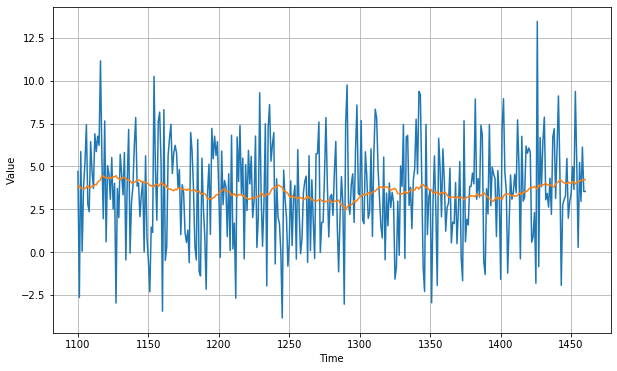

In [20]:
diff_mov_avg=moving_average(diff_series, 50)[1100-365-50:]

plt.figure(figsize=(10,6))
plot_series(time_test, diff_series[1100-365:])
plot_series(time_test, diff_mov_avg)

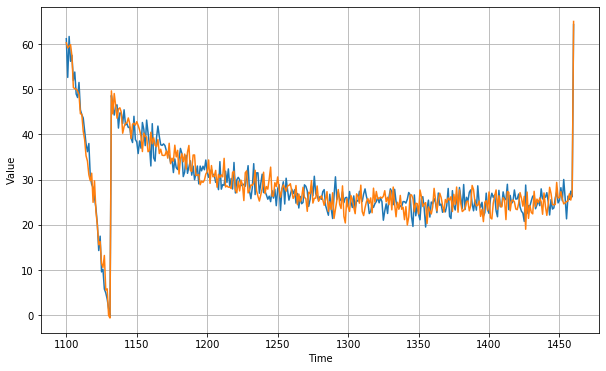

In [26]:
#add back the series[:-365]

diff_forecast=series[1100-365:-365]+diff_mov_avg

plt.figure(figsize=(10,6))
plot_series(time_test, series_test)
plot_series(time_test, diff_forecast)

In [27]:
print(keras.metrics.mean_squared_error(series_test,diff_forecast))
print(keras.metrics.mean_absolute_error(series_test,diff_forecast))

tf.Tensor(8.498155, shape=(), dtype=float32)
tf.Tensor(2.327179, shape=(), dtype=float32)


In [37]:
len(diff_forecast)

361

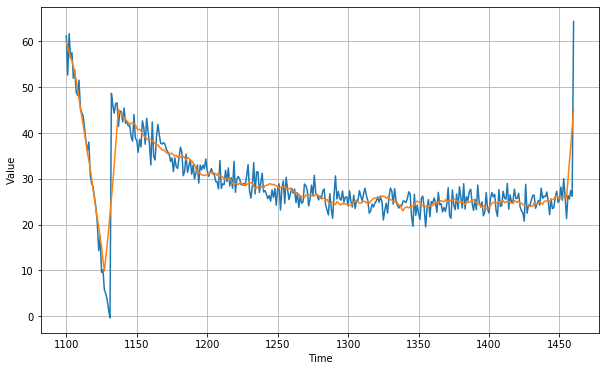

In [42]:
#lets try smoothing the series being added to reduce error further

diff_forecast_smoothed=moving_average(series[1100-370:-360],10)+diff_mov_avg

plt.figure(figsize=(10,6))
plot_series(time_test, series_test)
plot_series(time_test, diff_forecast_smoothed)

In [45]:
# print(keras.metrics.mean_squared_error(series_test, diff_forecast_smoothed))
print(keras.metrics.mean_absolute_error(series_test, diff_forecast_smoothed))

tf.Tensor(2.2034433, shape=(), dtype=float32)


### Summary
### We can use differencing to remove the trend and seasonality and then. We then calculate the mean fluctuations between the 2 phases. Finally, we take the last phase and add it back the mean fluctuations.

## Time series and Prediction- week 2 

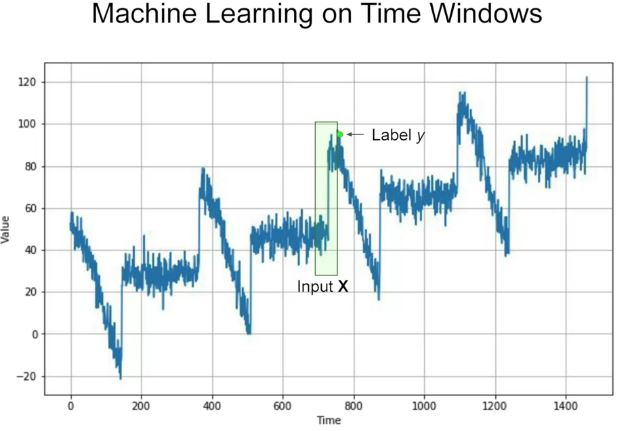

In [2]:
from IPython.display import Image
Image('ml_timewindows.jpg')

- The goal is predict the next price using a fixed window. So we look at the first 21 values and then predict the next value. As a result our features will be the first 20 values and label will be the 21st

In [28]:
dataset= tf.data.Dataset.range(10)
# by dropping the reaminder we cut the values remaining to the last column
dataset= dataset.window(5, shift=1, drop_remainder=True)
#extracting the values in a orderly fashion
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=' ')
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [35]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5, shift=1, drop_remainder=True)
dataset= dataset.flat_map(lambda window:window.batch(5))

#mapping to sperate xs and ys
dataset= dataset.map(lambda window: (window[:-1], window[-1:]))

#In order to shuffle data
dataset=dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(),y.numpy())

[1 2 3 4] [5]
[2 3 4 5] [6]
[0 1 2 3] [4]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [18]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5, shift=1, drop_remainder=True)
dataset= dataset.flat_map(lambda window:window.batch(5))
#mapping to sperate xs and ys
dataset= dataset.map(lambda window: (window[:-1], window[-1:]))
#In order to shuffle data
dataset=dataset.shuffle(buffer_size=10)
#batch allows us to batch our xs and ys in a set of 2 in this instance
dataset=dataset.batch(2).prefetch(1)
for x,y in dataset:
    print('x = ',x.numpy())
    
    print('y = ',y.numpy())

x =  [[4 5 6 7]
 [5 6 7 8]]
y =  [[8]
 [9]]
x =  [[3 4 5 6]
 [0 1 2 3]]
y =  [[7]
 [4]]
x =  [[2 3 4 5]
 [1 2 3 4]]
y =  [[6]
 [5]]


- we can batch two xs and two ys together to help increase the speed of training. 
We have also shuffled the sequences to avoid <u>sequence bias</u>.

In [67]:
def windowed_dataset (series, window_size, batch_size, shuffle_buffer):
    
    #pass the series to the tensor
    dataset= tf.data.Dataset.from_tensor_slices(series)
    #create ordered series to the size of window size throughout the series
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    #we now order it horizontally by calling the flatmap function
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    #shuffle the sequences and seperate out the xs and ys
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: ( window[:-1], window[-1:]))
    
    dataset=dataset.batch(batch_size).prefetch(1)
    
    return dataset
    

- the function above will take the <b>series</b> and the <b>window</b> size we want to use. The size of<b> batches</b> to use during training and a <b>shuffle buffer</b> which will determine how the data will be shuffled.
- 1) the first step will be to create a dataset from the series using <b> from_tensorflow_slices</b><br> 2) We will then use the <b>window method</b> of the dataset to slice the data up in appropriate windows, each one shifted by one value and keeping them all the same size.<br>3) We then flatten our data to the size of our window_size (<b>make them ordered horizontally to the length of our window size</b> )<br>4) Next, we shuffle it and seperate the xs and ys using the <b> map</b> method.<br> 5) Finally, it is  batched into the specified batch size and returned.

- <b> What we are effectively doing is taking our series and extracting the xs and ys using a specified window size, whilst shifting down the series by 1 value. We are also shuffling the data to avoid sequence bias. <br>At the very end we are wraping multiple distinct xs and ys values in a list according to the batch_size specified

In [69]:
split_time=1000

time_train=time[:split_time]
x_train= series[:split_time]

time_val= time[split_time:]
x_val= series[split_time:]

In [70]:
window_size=20
batch_size=32
shuffle_buffer=1000

#This will create our xs and ys from the series in several batches
dataset= windowed_dataset(series, window_size, batch_size, shuffle_buffer)

In [77]:
layer_0= tf.keras.layers.Dense(1, input_shape=[window_size])

model=tf.keras.models.Sequential([layer_0])

In [78]:
model.compile (loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))

history=model.fit(dataset, epochs=100, verbose=0)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [79]:
print('Layer weights {}'.format(layer_0.get_weights()))

Layer weights [array([[ 1.1396493e-01],
       [-6.4118341e-02],
       [-8.5355669e-02],
       [ 1.4465268e-02],
       [ 1.8157205e-01],
       [-7.6025598e-02],
       [-2.1005170e-01],
       [ 1.1257672e-01],
       [ 1.2281268e-01],
       [-8.1746377e-02],
       [ 1.1644499e-01],
       [-2.0016776e-01],
       [ 2.7283866e-02],
       [ 3.6771134e-02],
       [-9.9627674e-02],
       [ 1.9422176e-01],
       [-4.2435169e-02],
       [-3.1745440e-04],
       [ 1.1681937e-01],
       [ 8.0784613e-01]], dtype=float32), array([0.02163101], dtype=float32)]


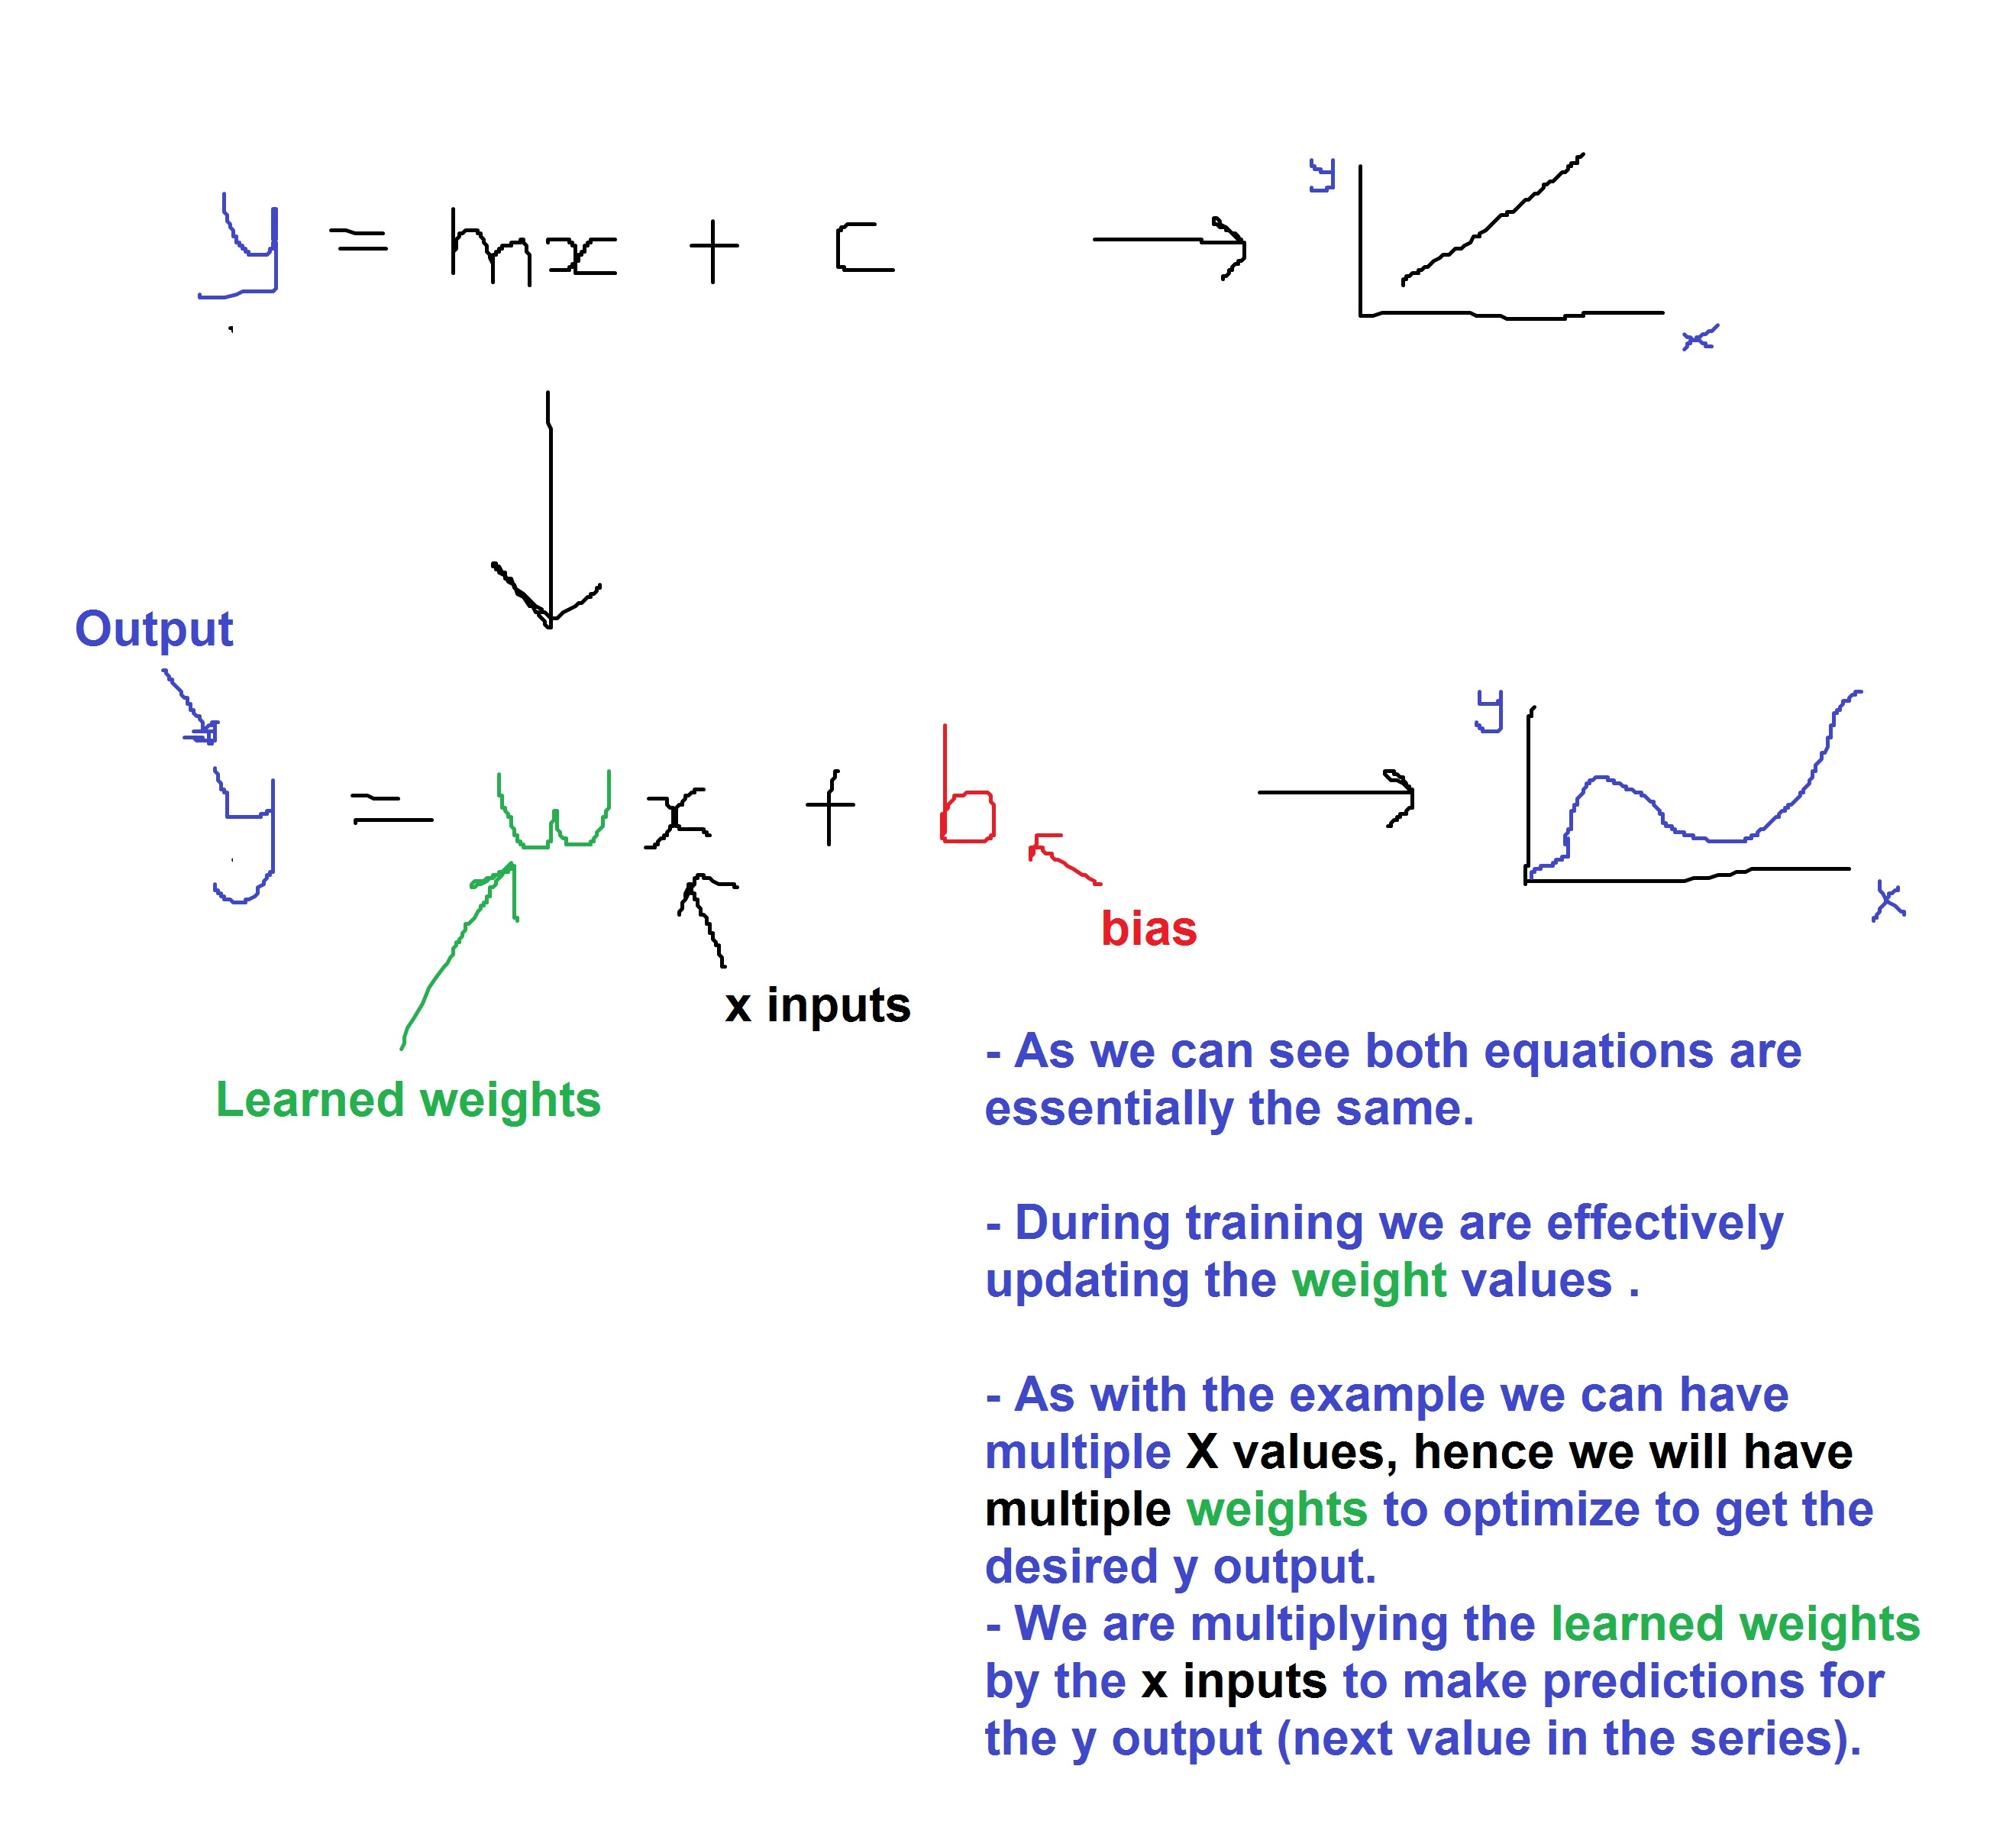

In [80]:
Image('quick.jpg')

In [82]:
print(series[1:21])

model.predict(series[1:21][np.newaxis])

[49.660896 51.025326 52.424427 48.415695 47.780396 50.633144 48.099857
 44.583878 45.43716  42.13009  40.71074  40.59698  34.648506 33.284378
 33.772278 30.944027 31.588247 27.05832  23.896534 27.439226]


array([[25.551456]], dtype=float32)

In [ ]:
- np.new axis reshapes the output tot the input dimesion thats used in the model

In [84]:
series[1:22]

array([49.660896, 51.025326, 52.424427, 48.415695, 47.780396, 50.633144,
       48.099857, 44.583878, 45.43716 , 42.13009 , 40.71074 , 40.59698 ,
       34.648506, 33.284378, 33.772278, 30.944027, 31.588247, 27.05832 ,
       23.896534, 27.439226, 21.791237], dtype=float32)

In [85]:
forecast=[]
for time in range(len(series)- window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

In [86]:
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

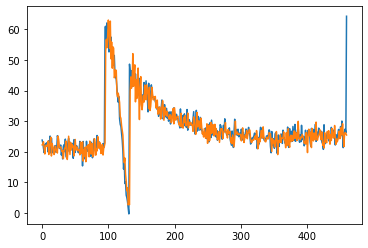

In [88]:
p= range(0, len(results))

plt.plot(p, x_val)
plt.plot(p, results)

In [90]:
print(tf.keras.metrics.mean_absolute_error(x_val, results))

tf.Tensor(2.6536846, shape=(), dtype=float32)


### Quick Exercise

In [91]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")  
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

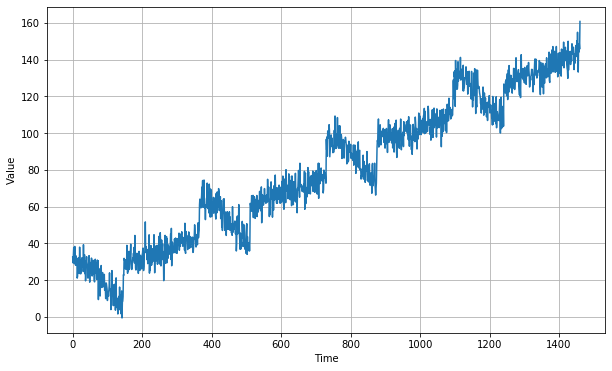

In [94]:
plt.figure(figsize=(10, 6))
plot_series(range(0,len(series)), series)

In [102]:
def windowed_datsser(series, window_size, batch_size, shuuffle_buffer):
    #place series values in tensors
    dataset= tf.data.Dataset.from_tensor_slices(series)
    #create ordered lists with specific length shifting down by 1
    dataset=dataset.window(winodw_size+1, shift=1, drop_remainder=True)
    #order the sequences horizontally inline according to the window size
    dataset=dataset.flat_map(lambda window: window.batch(window_size +1))
    #seperate the xs and ys from the ordered sequences
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1:]))
    dataset=dataset.batch(batch_size).prefetch(1)
    

In [103]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [107]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
history=model.fit(dataset, epochs=100, verbose=1)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 170.7755
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 43.7808
Epoch 3/100
31/31 [==============================] - 0s 867us/step - loss: 40.2987
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 39.6261
Epoch 5/100
31/31 [==============================] - 0s 900us/step - loss: 40.7530
Epoch 6/100
31/31 [==============================] - 0s 833us/step - loss: 40.6623
Epoch 7/100
31/31 [==============================] - 0s 967us/step - loss: 39.6054
Epoch 8/100
31/31 [==============================] - 0s 967us/step - loss: 39.0568
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 38.6701
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 39.3252
Epoch 11/100
31/31 [==============================] - 0s 967us/step - loss: 38.6082
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 38.3166
Epoch 13/100

<Figure size 432x288 with 0 Axes>

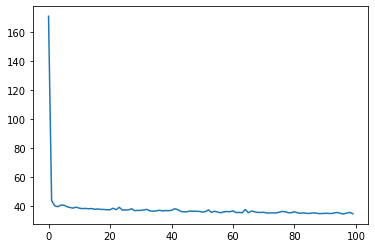

<Figure size 432x288 with 0 Axes>

In [111]:
import matplotlib.pyplot as plt


loss= history.history['loss']
epochs= range(len(loss))
plt.plot(epochs,loss)
plt.figure()


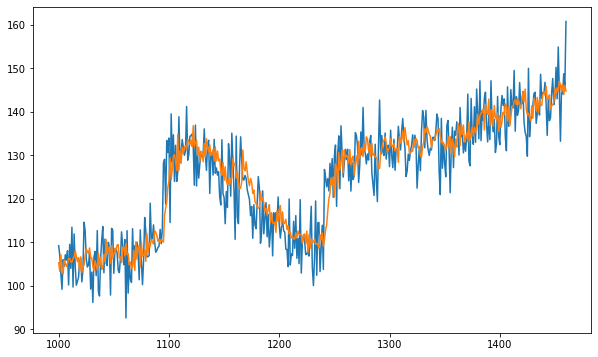

In [112]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))


forecast=forecast[split_time-window_size:]
results= np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, results)

In [114]:
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

4.5488048


### Using optimal learning rate [throught callbacks]

In [137]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[window_size]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, )
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


- As we can see in the singe neuron example, we had 21 weight parameters to optimize for. But now we have up to 331 weight parameters to optimize.

In [120]:
lr_schedule= tf.keras.callbacks.LearningRateScheduler(
lambda epoch: 1e-8 *10**(epoch/20))

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=9e-6, momentum=0.9))
history=model.fit(dataset, epochs=100, callbacks=[lr_schedule])

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 4655.0801
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 2472.5334
Epoch 3/100
31/31 [==============================] - 0s 900us/step - loss: 1049.3638
Epoch 4/100
31/31 [==============================] - 0s 967us/step - loss: 367.8352
Epoch 5/100
31/31 [==============================] - 0s 933us/step - loss: 114.2174
Epoch 6/100
31/31 [==============================] - 0s 967us/step - loss: 52.2167
Epoch 7/100
31/31 [==============================] - 0s 867us/step - loss: 42.5207
Epoch 8/100
31/31 [==============================] - 0s 867us/step - loss: 41.5092
Epoch 9/100
31/31 [==============================] - 0s 967us/step - loss: 41.4518
Epoch 10/100
31/31 [==============================] - 0s 933us/step - loss: 41.4254
Epoch 11/100
31/31 [==============================] - 0s 867us/step - loss: 41.3959
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 41.3588

- The <b>LearningRateScheduler</b> above allows us make changes to our learning at each epoch. 

- For example, in the first epoch our learning rate will be (1e-8 x 10^<b>1/20</b>). And in the second epoch our learning will adjust to (1e-8 x 10^<b>2/20</b>)

- <b>As mentioned before this will change dynamically after each epoch as we have called in callback parameter in the model.fit

ValueError: x and y must have same first dimension, but have shapes (100,) and (500,)

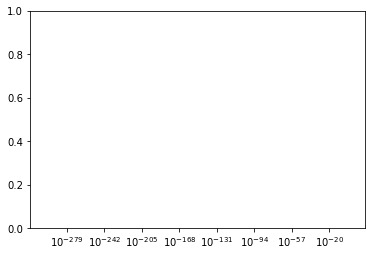

In [158]:
#plotting the learning rate
lrs=1e-8 *(10 **(np.arange(100)/20))

plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-8, 1e-3, 0, 300]) #selecting intervals for plotting

- The above chart we calculated loss per each epoch vs the loss in error(mse). As we can see as we increased the learning rate the loss increased vertically up. 
- The loss is at its <b>lowest (optimal) between 3x10-8  and 1x10-6

In [139]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))

history=model.fit(dataset, epochs=500)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
31/31 [==============================] - 1s 8ms/step - loss: 4414.3696
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 74.3015
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 58.2955
Epoch 4/500
31/31 [==============================] - 0s 967us/step - loss: 57.8278
Epoch 5/500
31/31 [==============================] - 0s 900us/step - loss: 57.5250
Epoch 6/500
31/31 [==============================] - 0s 800us/step - loss: 57.3652
Epoch 7/500
31/31 [==============================] - 0s 933us/step - loss: 57.2042
Epoch 8/500
31/31 [==============================] - 0s 1ms/step - loss: 57.0203
Epoch 9/500
31/31 [==============================] - 0s 800us/step - loss: 57.0645
Epoch 10/500
31/31 [==============================] - 0s 933us/step - loss: 56.6936
Epoch 11/500
31/31 [==============================] - 0s 833us/step - loss: 56.5781
Epoch 12/500
31/31 [==============================] - 0s 1ms/step - loss: 56.4096
Epoch 13/

31/31 [==============================] - 0s 967us/step - loss: 45.4043
Epoch 197/500
31/31 [==============================] - 0s 900us/step - loss: 45.3874
Epoch 198/500
31/31 [==============================] - 0s 900us/step - loss: 45.3972
Epoch 199/500
31/31 [==============================] - 0s 900us/step - loss: 45.3774
Epoch 200/500
31/31 [==============================] - 0s 900us/step - loss: 45.3055
Epoch 201/500
31/31 [==============================] - 0s 900us/step - loss: 45.2412
Epoch 202/500
31/31 [==============================] - 0s 833us/step - loss: 45.2444
Epoch 203/500
31/31 [==============================] - 0s 933us/step - loss: 45.2163
Epoch 204/500
31/31 [==============================] - 0s 933us/step - loss: 45.1602
Epoch 205/500
31/31 [==============================] - 0s 933us/step - loss: 45.1815
Epoch 206/500
31/31 [==============================] - 0s 967us/step - loss: 45.1963
Epoch 207/500
31/31 [==============================] - 0s 900us/step - loss: 45

Epoch 293/500
31/31 [==============================] - 0s 933us/step - loss: 43.0598
Epoch 294/500
31/31 [==============================] - 0s 800us/step - loss: 43.0150
Epoch 295/500
31/31 [==============================] - 0s 900us/step - loss: 43.0243
Epoch 296/500
31/31 [==============================] - 0s 800us/step - loss: 42.9926
Epoch 297/500
31/31 [==============================] - 0s 967us/step - loss: 42.9788
Epoch 298/500
31/31 [==============================] - 0s 967us/step - loss: 43.0748
Epoch 299/500
31/31 [==============================] - 0s 800us/step - loss: 43.0521
Epoch 300/500
31/31 [==============================] - 0s 967us/step - loss: 43.0623
Epoch 301/500
31/31 [==============================] - 0s 1ms/step - loss: 42.8784
Epoch 302/500
31/31 [==============================] - 0s 933us/step - loss: 42.8748
Epoch 303/500
31/31 [==============================] - 0s 967us/step - loss: 42.8648
Epoch 304/500
31/31 [==============================] - 0s 967us/ste

31/31 [==============================] - 0s 967us/step - loss: 40.4795
Epoch 488/500
31/31 [==============================] - 0s 833us/step - loss: 40.3601
Epoch 489/500
31/31 [==============================] - 0s 1ms/step - loss: 40.3208
Epoch 490/500
31/31 [==============================] - 0s 1ms/step - loss: 40.3667
Epoch 491/500
31/31 [==============================] - 0s 933us/step - loss: 40.2689
Epoch 492/500
31/31 [==============================] - 0s 967us/step - loss: 40.2929
Epoch 493/500
31/31 [==============================] - 0s 1ms/step - loss: 40.2800
Epoch 494/500
31/31 [==============================] - 0s 1ms/step - loss: 40.2997
Epoch 495/500
31/31 [==============================] - 0s 1ms/step - loss: 40.3260
Epoch 496/500
31/31 [==============================] - 0s 1ms/step - loss: 40.3611
Epoch 497/500
31/31 [==============================] - 0s 833us/step - loss: 40.2843
Epoch 498/500
31/31 [==============================] - 0s 1ms/step - loss: 40.2292
Epoch 49

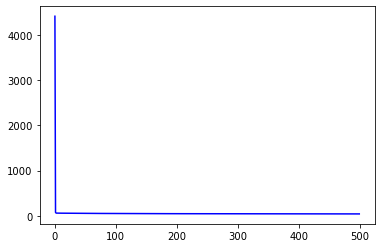

In [140]:
loss= history.history['loss']
epochs= range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

- We should have stopped training at 350 to save on time as loss is not really decreasing

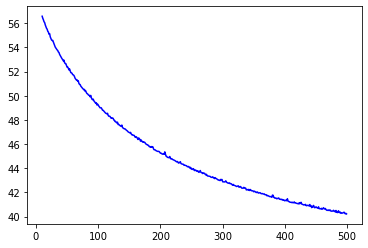

In [141]:
loss= history.history['loss']
epochs= range(10,len(loss))
plot_loss= loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

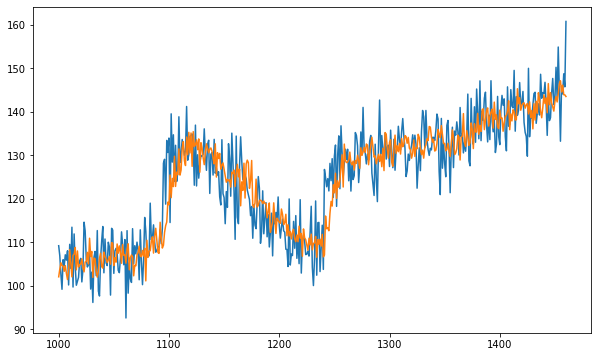

In [151]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))


forecast=forecast[split_time-window_size:]
results= np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, results)

In [157]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

4.6878495

### Summary

- <b>We can see that by using using multiple layers we can reduce the loss even further. Also using an optimal learning rate helps reduce loss even further. 

- In the following secions we will take into account the sequences of the datapoints by usingRNN and LSTM

### Week 3

- Since Time series is temporal (the 21st value will have abigger impact on the next value rather than the 1st value in the series) we need to use LSTMs for higher accuracy. LSTMs can factor temporal conditions since it has a cell state which allows them to maintain context across a series.
- <font color='red'><b> RNN and LSTMs are 3 dimensional. 1st is for batch size, 2nd is for len of timestep/window_size and 3rd is for dimension of each input at each timestep

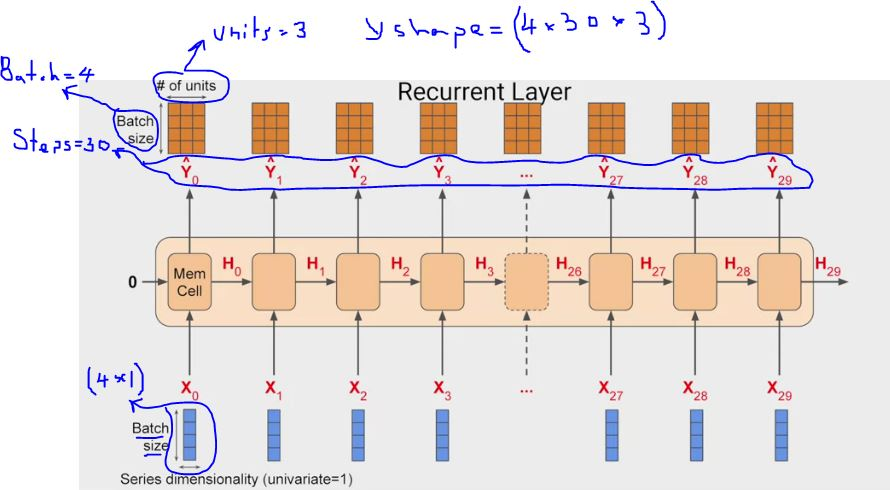

In [160]:
Image('rnn_shape.jpg')

- Recurent neurons work by feeding the next cell with X1 <b>aswell as Y1.</b>. <b>As a result the last cell Y29 Output will comprise of H0.

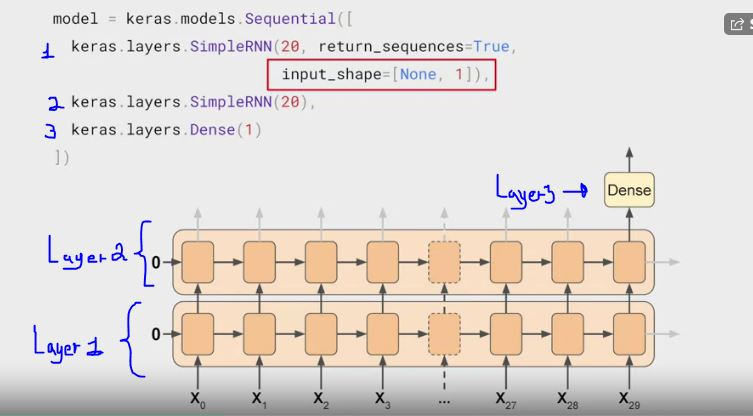

In [161]:
Image('return_sequence.jpg')

- The design of one return sequence will gove us an output of one Dense output which is what we need for Time series data.

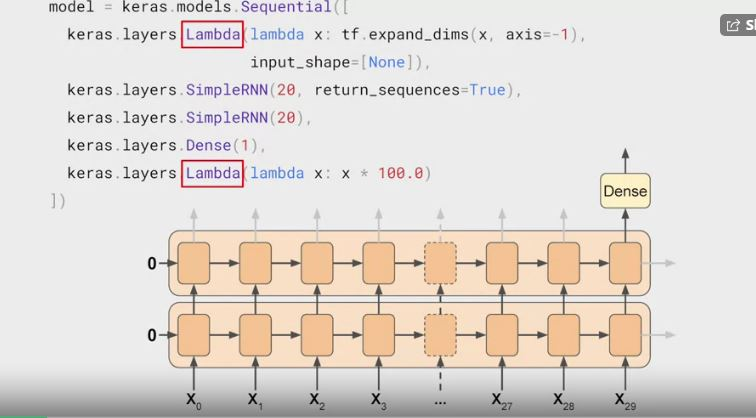

In [162]:
Image('lambda.jpg')

- We can use <b>Lambda</b> layers to expand functionnality of Tensorflow Keras
- In the above exmaple we are expanding our array by 1 dimensions and also we are scaling the outputs by 100.

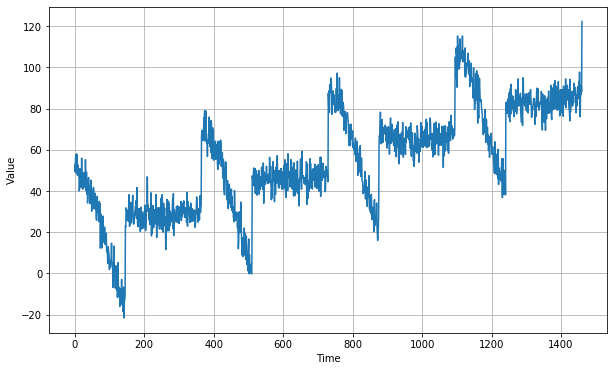

In [43]:
#GENRATING THE SYNTHETIC DATA
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [44]:
split_time=1000

time_train=time[:split_time]
x_train=series[:split_time]

time_val=time[split_time:]
x_val=series[split_time:]

window_size=20
batch_size=32
shuffle_buffer=1000

In [45]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1:]))
    dataset=dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [8]:
tf.random.set_seed(51)
np.random.seed(51)

train_series= windowed_dataset(series, window_size, batch_size=128, shuffle_buffer=shuffle_buffer)

In [172]:
model= tf.keras.Sequential([
    
    #specifying dimension input to our model pipeline
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    #Sequence to sequence RNN
    tf.keras.layers.SimpleRNN(40, return_sequences=True),
    #sequence to vector RNN
    tf.keras.layers.SimpleRNN(40),
    #output layer (regression model)
    tf.keras.layers.Dense(1),
    #multiplying the output by 100
    tf.keras.layers.Lambda(lambda x: x*100.0)       
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 40)          1680      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 40)                3240      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 41        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [173]:
#Changing our learning rate dynamically
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 *10**(epoch/20))

In [177]:

optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
             optimizer=optimizer,
             metrics=['mae'])

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


- We have chosen to use <b>Huber </b> to calculate our loss as its less sensitive to outlier values. Huber is ideal for dataset which have a lot of noise in them.
- The Huber loss is quadratic to small errors and linear to large ones.

In [178]:
history=model.fit(train_series, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
12/12 [==============================] - 4s 19ms/step - loss: 191.8314 - mae: 192.3314
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 190.3596 - mae: 190.8596
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 188.1599 - mae: 188.6599
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 185.4655 - mae: 185.9655
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 182.2942 - mae: 182.7942
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 178.4975 - mae: 178.9975
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 173.8824 - mae: 174.3824
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 168.0597 - mae: 168.5597
Epoch 9/100
12/12 [==============================] - 0s 11ms/step - loss: 160.3765 - mae: 160.8765
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 150.0332 - mae: 150.5332
Epoch 11/100

[1e-08, 0.0001, 0, 30]

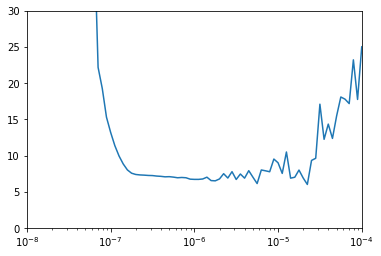

In [183]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30]) #zooming in

- We can see the optimal learning rate is 9x10^7
- <b><font color='red'> Important!!! We need to make sure we remove the callbacks once we chose our optimal learning rate</font>

In [187]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


train_series=windowed_dataset(series, window_size, batch_size=120,
                             shuffle_buffer=shuffle_buffer)

model=tf.keras.Sequential([
    
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    
    tf.keras.layers.SimpleRNN(40, return_sequences=True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1),
    
    tf.keras.layers.Lambda(lambda x: x*100.0)
])

optimizer=tf.keras.optimizers.SGD(lr=9e-7, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

history=model.fit(train_series, epochs=400)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
13/13 [==============================] - 2s 13ms/step - loss: 151.8215 - mae: 152.3215
Epoch 2/400
13/13 [==============================] - 0s 9ms/step - loss: 27.3577 - mae: 27.8549
Epoch 3/400
13/13 [==============================] - 0s 9ms/step - loss: 14.3649 - mae: 14.8591
Epoch 4/400
13/13 [==============================] - 0s 9ms/step - loss: 10.6257 - mae: 11.1151
Epoch 5/400
13/13 [==============================] - 0s 9ms/step - loss: 8.7191 - mae: 9.2058
Epoch 6/400
13/13 [==============================] - 0s 9ms/step - loss: 8.1587 - mae: 8.6431
Epoch 7/400
13/13 [==============================] - 0s 9ms/step - loss: 7.8371 - mae: 8.3229
Epoch 8/400
13/13 [==============================] - 0s 9ms/step - loss: 7.0045 - mae: 7.4877
Epoch 9/400
13/13 [==============================] - 0s 9ms/step - loss: 7.3316 - mae: 7.8164
Epoch 10/400
13/13 [==============================] - 0s 9ms/step - loss: 6.6590 - mae: 7.1431
Epoch 11/400
13/13 [============================

13/13 [==============================] - 0s 9ms/step - loss: 5.0843 - mae: 5.5611
Epoch 173/400
13/13 [==============================] - 0s 9ms/step - loss: 6.3505 - mae: 6.8356
Epoch 174/400
13/13 [==============================] - 0s 9ms/step - loss: 5.9148 - mae: 6.3915
Epoch 175/400
13/13 [==============================] - 0s 9ms/step - loss: 6.0471 - mae: 6.5276
Epoch 176/400
13/13 [==============================] - 0s 9ms/step - loss: 5.5940 - mae: 6.0740
Epoch 177/400
13/13 [==============================] - 0s 9ms/step - loss: 5.3781 - mae: 5.8578
Epoch 178/400
13/13 [==============================] - 0s 9ms/step - loss: 4.8999 - mae: 5.3775
Epoch 179/400
13/13 [==============================] - 0s 9ms/step - loss: 5.0206 - mae: 5.4954
Epoch 180/400
13/13 [==============================] - 0s 9ms/step - loss: 4.8715 - mae: 5.3449
Epoch 181/400
13/13 [==============================] - 0s 9ms/step - loss: 5.0123 - mae: 5.4897
Epoch 182/400
13/13 [==============================] -

13/13 [==============================] - 0s 9ms/step - loss: 4.8325 - mae: 5.3090
Epoch 343/400
13/13 [==============================] - 0s 9ms/step - loss: 5.0565 - mae: 5.5346
Epoch 344/400
13/13 [==============================] - 0s 9ms/step - loss: 4.7407 - mae: 5.2165
Epoch 345/400
13/13 [==============================] - 0s 9ms/step - loss: 5.2820 - mae: 5.7630
Epoch 346/400
13/13 [==============================] - 0s 9ms/step - loss: 5.0673 - mae: 5.5465
Epoch 347/400
13/13 [==============================] - 0s 9ms/step - loss: 4.7570 - mae: 5.2328
Epoch 348/400
13/13 [==============================] - 0s 9ms/step - loss: 4.9119 - mae: 5.3874
Epoch 349/400
13/13 [==============================] - 0s 9ms/step - loss: 4.8139 - mae: 5.2894
Epoch 350/400
13/13 [==============================] - 0s 9ms/step - loss: 5.2759 - mae: 5.7534
Epoch 351/400
13/13 [==============================] - 0s 9ms/step - loss: 4.8136 - mae: 5.2910
Epoch 352/400
13/13 [==============================] -

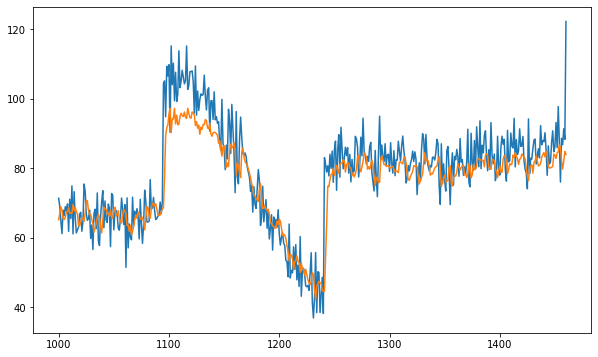

In [189]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    

forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))
plt.plot(time_val, x_val)
plt.plot(time_val, results)

In [190]:
print(tf.keras.metrics.mean_absolute_error(x_val, results))

tf.Tensor(5.5701656, shape=(), dtype=float32)


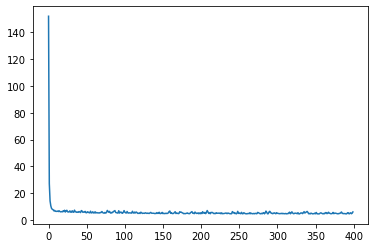

In [192]:
p=range(len(history.history['loss']))

plt.plot(p,history.history['loss'])

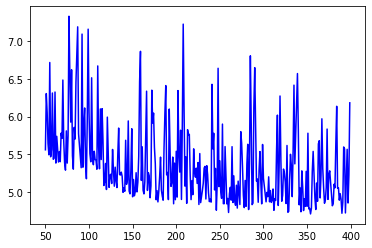

In [195]:
loss= history.history['loss']
epochs= range(50,len(loss))
plot_loss= loss[50:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

<Figure size 432x288 with 0 Axes>

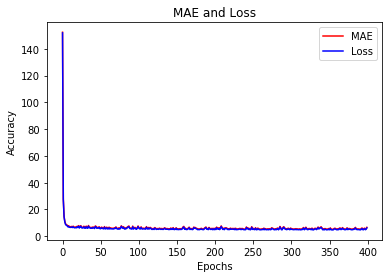

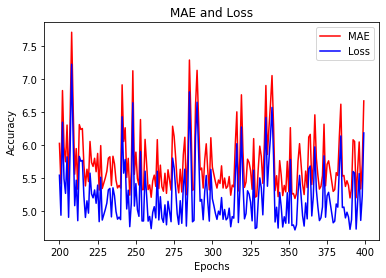

<Figure size 432x288 with 0 Axes>

In [196]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

### Using LSTMs instead of RNNs
- We will use LSTMs instead of RNNs since LSTMs have cell states which allow them to maintain context in the series even in the initial values.
- With LSTMs we are also able to bidirectional cell states which can maintain context forward aswell as backwards.

In [48]:
dataset=windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)

In [30]:
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                           input_shape=[None]),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    
    tf.keras.layers.Lambda(lambda x: x*100.0)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [31]:
optimizer= tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
model.compile(loss='mse', optimizer=optimizer)
model.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 6s 17ms/step - loss: 402.5146
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 104.9294
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 78.5806
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 66.5086
Epoch 5/100
31/31 [==============================] - 1s 17ms/step - loss: 64.9445
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 58.7480
Epoch 7/100
31/31 [==============================] - 1s 17ms/step - loss: 58.4415
Epoch 8/100
31/31 [==============================] - 1s 17ms/step - loss: 54.7018
Epoch 9/100
31/31 [==============================] - 1s 17ms/step - loss: 50.9663
Epoch 10/100
31/31 [==============================] - 1s 17ms/step - loss: 51.1431
Epoch 11/100
31/31 [==============================] - 1s 17ms/step - loss: 54.9729
Epoch 12/100
31/31 [==============================] - 1s 17ms/step - loss: 53.2436
Epoch 13/10

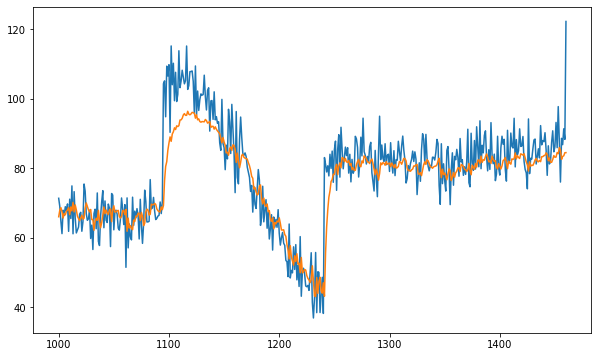

In [33]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plt.plot(time_val, x_val)
plt.plot(time_val, results)

In [35]:
print(tf.keras.metrics.mean_absolute_error(results, x_val).numpy())

5.521528


- As we can see there is slight improvement (LSTM) in the performance when compared to thr RNN

### Finding the optimal learning rate with LSTM

In [54]:

tf.keras.backend.clear_session()

model= tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                          input_shape=[None]),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    
    tf.keras.layers.Lambda(lambda x: x*100.0)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                8704      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [56]:
lr_schedule= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8* 10**(epoch/20))

optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
             optimizer=optimizer,
             metrics=['mae'])

history= model.fit(dataset, epochs=100, callbacks=[lr_schedule])

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
31/31 [==============================] - 4s 9ms/step - loss: 41.7319 - mae: 42.2316
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 40.4066 - mae: 40.9064
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 38.8042 - mae: 39.3040
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 37.0155 - mae: 37.5147
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 35.0221 - mae: 35.5215
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 32.7878 - mae: 33.2875
Epoch 7/100
31/31 [==============================] - 0s 9ms/step - loss: 30.2858 - mae: 30.7851
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 27.5017 - mae: 27.9998
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 24.3926 - mae: 24.8900
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 21.0539 - mae: 21.5477
Epoch 11/100
31/31 [==================

[1e-08, 0.0001, 0, 30]

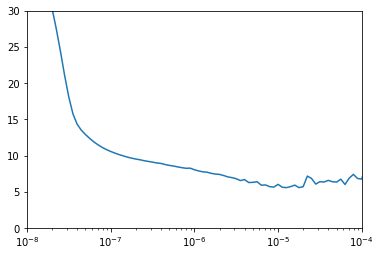

In [61]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

- optimal learning rate is 1x10-5

In [68]:
tf.keras.backend.clear_session()

model= tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    
    tf.keras.layers.Dense(1),
    
    tf.keras.layers.Lambda(lambda x: x*100.0)
                           
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [69]:
optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer,
             metrics=['mae'])
model.fit(dataset, epochs=100)

Epoch 1/100

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")



31/31 [==============================] - 7s 18ms/step - loss: 26.1584 - mae: 26.6538
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 6.4860 - mae: 6.9650
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 5.4916 - mae: 5.9688
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 5.5135 - mae: 5.9961
Epoch 5/100
31/31 [==============================] - 1s 17ms/step - loss: 5.4638 - mae: 5.9417
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 5.1117 - mae: 5.5919
Epoch 7/100
31/31 [==============================] - 1s 22ms/step - loss: 5.5795 - mae: 6.0607
Epoch 8/100
31/31 [==============================] - 1s 18ms/step - loss: 5.4902 - mae: 5.9679
Epoch 9/100
31/31 [==============================] - 1s 17ms/step - loss: 5.2514 - mae: 5.7298
Epoch 10/100
31/31 [==============================] - 1s 17ms/step - loss: 5.3675 - mae: 5.8454
Epoch 11/100
31/31 [==============================] - 1s 1

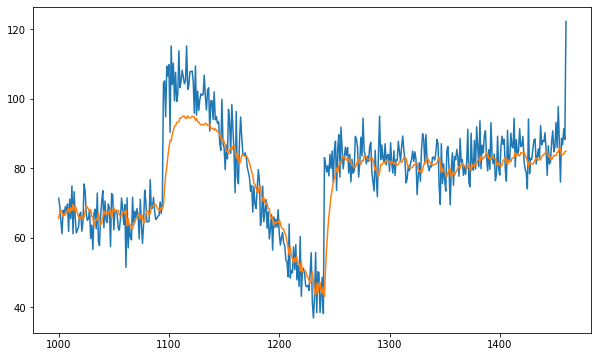

In [71]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plt.plot(time_val, x_val)
plt.plot(time_val, results)

In [73]:
print(tf.keras.metrics.mean_absolute_error(x_val, results))

tf.Tensor(5.5470586, shape=(), dtype=float32)


## Week 4
- For this week we will use Convolution layers aswell as LSTM to predict sequence data

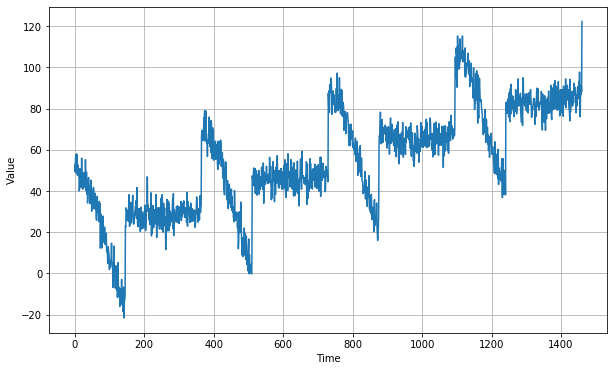

In [103]:
# series
#GENRATING THE SYNTHETIC DATA
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [50]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model=tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, 
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None,1]),
    
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x*200.0)
    
])

optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8*10**(epoch/20))

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0         
Total params: 16,865
Trainable params: 16,865
Non-trainable params: 0
_________________________________________________________________


C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


- We have added the convolution layer. We will learn on the data now using the <b>32 different filters</b> that have been constructed using a <b>5 window kernel</b>.This will help us spot patterns in the dataset much easier.

In [100]:
#For dataset without Convolutions
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ##############################################################
    #added line for Conv purpose( needs to be 3D)
    series= tf.expand_dims(series, axis=-1)
    #############################################################
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1:]))
    dataset=dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [101]:
#HELPER FUNCTION FOR FORECASTING 
#as our Data is now 3D (we expanded the dims) for Convolution purposes

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))#NOT window_size+1
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    #created ordered horizontal series according to the winodw_size 
    #and we are passing the model the series
    return forecast

In [104]:
split_time=1000

time_train=time[:split_time]
x_train=series[:split_time]

time_val=time[split_time:]
x_val=series[split_time:]

window_size=20
batch_size=32
shuffle_buffer=1000

In [54]:
dataset=windowed_dataset(series, window_size, batch_size, shuffle_buffer)

In [55]:
history=model.fit(dataset, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
46/46 [==============================] - 12s 46ms/step - loss: 65.6581 - mae: 66.1579
Epoch 2/100
46/46 [==============================] - 2s 46ms/step - loss: 49.0154 - mae: 49.5147
Epoch 3/100
46/46 [==============================] - 2s 46ms/step - loss: 44.3583 - mae: 44.8567: 0s - loss: 44.4495 - mae: 44
Epoch 4/100
46/46 [==============================] - 2s 46ms/step - loss: 41.0617 - mae: 41.5596
Epoch 5/100
46/46 [==============================] - 2s 46ms/step - loss: 37.9174 - mae: 38.4153
Epoch 6/100
46/46 [==============================] - ETA: 0s - loss: 34.8750 - mae: 35.372 - 2s 46ms/step - loss: 34.8594 - mae: 35.3570
Epoch 7/100
46/46 [==============================] - 2s 47ms/step - loss: 32.0382 - mae: 32.5351
Epoch 8/100
46/46 [==============================] - 2s 46ms/step - loss: 29.4859 - mae: 29.9822
Epoch 9/100
46/46 [==============================] - ETA: 0s - loss: 27.1047 - mae: 27.601 - 2s 47ms/step - loss: 27.1047 - mae: 27.6011
Epoch 10/100
46/

[1e-08, 0.0001, 0, 20]

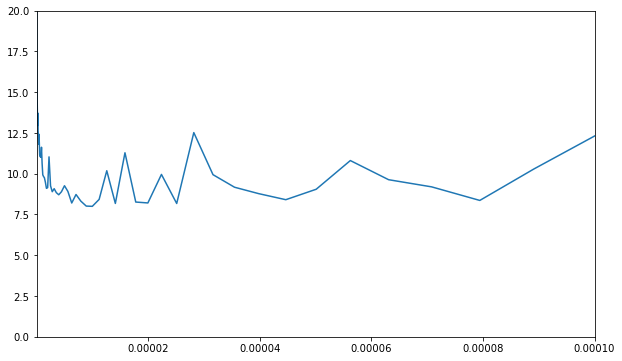

In [62]:
plt.figure(figsize=(10,6))

plt.plot(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-4, 0, 20])

In [63]:
#optimal learning rate 1.5x10-5

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model=tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, 
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None,1]),
    
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x*200.0)
    
])

optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

# lr_scheduler=tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8*10**(epoch/20))

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0         
Total params: 16,865
Trainable params: 16,865
Non-trainable params: 0
_________________________________________________________________


C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


- Now that we have identified our optimal learning rate we can use it reduce the loss even further within the 100 epochs

In [64]:
history=model.fit(dataset, epochs=100)

Epoch 1/100
46/46 [==============================] - 12s 51ms/step - loss: 19.2546 - mae: 19.7486
Epoch 2/100
46/46 [==============================] - 2s 49ms/step - loss: 11.1113 - mae: 11.6004
Epoch 3/100
46/46 [==============================] - 3s 50ms/step - loss: 9.4604 - mae: 9.9468
Epoch 4/100
46/46 [==============================] - 2s 48ms/step - loss: 9.7708 - mae: 10.2575
Epoch 5/100
46/46 [==============================] - 3s 54ms/step - loss: 10.4131 - mae: 10.9023
Epoch 6/100
46/46 [==============================] - 3s 49ms/step - loss: 9.8677 - mae: 10.3563
Epoch 7/100
46/46 [==============================] - 3s 50ms/step - loss: 10.5596 - mae: 11.0496
Epoch 8/100
46/46 [==============================] - 3s 50ms/step - loss: 8.5836 - mae: 9.0699
Epoch 9/100
46/46 [==============================] - 3s 54ms/step - loss: 8.1130 - mae: 8.5967
Epoch 10/100
46/46 [==============================] - 3s 51ms/step - loss: 8.2558 - mae: 8.7407
Epoch 11/100
46/46 [==================

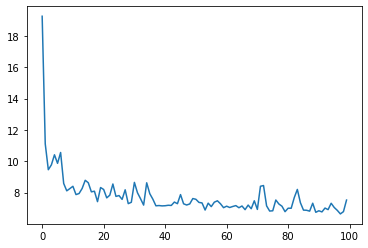

In [65]:
plt.plot(range(0,len(history.history['loss'])), history.history['loss'])

In [112]:
LSTM_forecast = model_forecast(model, series[0:, np.newaxis], window_size)
LSTM_forecast = LSTM_forecast[split_time - window_size:-1, -1, 0]

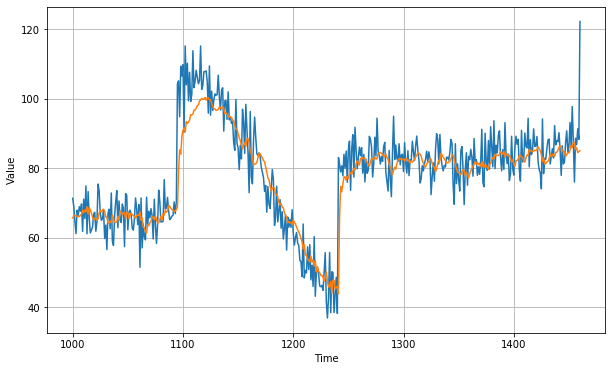

In [113]:
plt.figure(figsize=(10, 6))
plot_series(time_tval, x_val)
plot_series(time_tval, LSTM_forecast)

In [114]:
print(tf.keras.metrics.mean_absolute_error(x_val, LSTM_forecast).numpy())

5.0483403


<Figure size 432x288 with 0 Axes>

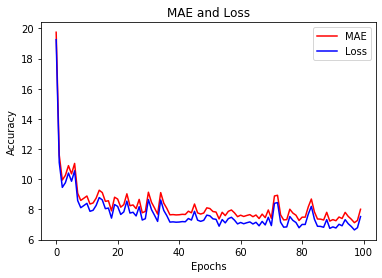

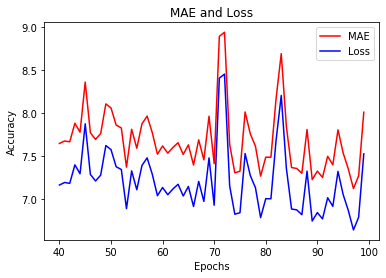

<Figure size 432x288 with 0 Axes>

In [117]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[40:]
mae_zoom = mae[40:]
loss_zoom = loss[40:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

###### Understanding the code (<font color='red'>trying</font> alterantive ways)

In [119]:
series

array([ 52.48357 ,  49.35275 ,  53.314735, ...,  91.37325 ,  88.32383 ,
       122.30772 ], dtype=float32)

In [141]:
series[..., np.newaxis]#three dots ... is exactly them to [0:]

array([[ 52.48357 ],
       [ 49.35275 ],
       [ 53.314735],
       ...,
       [ 91.37325 ],
       [ 88.32383 ],
       [122.30772 ]], dtype=float32)

In [118]:
series[0:, np.newaxis]

array([[ 52.48357 ],
       [ 49.35275 ],
       [ 53.314735],
       ...,
       [ 91.37325 ],
       [ 88.32383 ],
       [122.30772 ]], dtype=float32)

In [171]:
LSTM_forecast = model_forecast(model, series[0:, np.newaxis], window_size)
LSTM_forecast

array([[[52.30282 ],
        [49.003136],
        [50.178886],
        ...,
        [44.14645 ],
        [42.5874  ],
        [42.88627 ]],

       [[49.035408],
        [48.959118],
        [51.928116],
        ...,
        [42.75718 ],
        [43.041058],
        [44.576485]],

       [[53.159492],
        [53.235786],
        [52.14337 ],
        ...,
        [42.95032 ],
        [44.481617],
        [43.23919 ]],

       ...,

       [[82.41584 ],
        [84.65178 ],
        [86.351395],
        ...,
        [84.936   ],
        [84.08666 ],
        [86.94943 ]],

       [[82.20519 ],
        [85.52079 ],
        [86.39616 ],
        ...,
        [84.080444],
        [86.9632  ],
        [86.442696]],

       [[83.82395 ],
        [84.659096],
        [83.4688  ],
        ...,
        [86.8587  ],
        [86.34386 ],
        [96.58206 ]]], dtype=float32)

In [172]:
LSTM_forecast.shape

(1442, 20, 1)

In [177]:
LSTM_forecast = LSTM_forecast[split_time - window_size:-1, -1, 0]
LSTM_forecast

array([ 62.523853,  63.920383,  65.82835 ,  64.884605,  63.901688,
        64.027855,  64.0309  ,  65.07891 ,  64.98838 ,  65.25276 ,
        64.27109 ,  65.08317 ,  64.14838 ,  66.70553 ,  64.26963 ,
        66.25799 ,  64.4787  ,  66.4498  ,  64.42595 ,  63.495724,
        63.31073 ,  63.37589 ,  62.876656,  62.561108,  64.54114 ,
        66.42517 ,  66.92496 ,  65.855896,  65.39428 ,  65.66827 ,
        64.54237 ,  63.664032,  61.365562,  62.366253,  62.364136,
        63.11669 ,  63.83437 ,  62.205154,  63.351173,  62.537987,
        64.05212 ,  66.0938  ,  64.3416  ,  64.51859 ,  64.15194 ,
        65.97058 ,  65.55218 ,  65.680954,  64.591774,  64.376   ,
        65.02715 ,  66.92408 ,  65.34382 ,  65.5597  ,  66.7996  ,
        64.95423 ,  63.84303 ,  63.49513 ,  64.58589 ,  64.98413 ,
        64.57265 ,  64.818085,  62.056965,  63.49549 ,  60.041904,
        62.967564,  60.985023,  62.391003,  62.75212 ,  61.900623,
        63.312576,  63.238983,  64.75524 ,  64.510666,  63.959

In [123]:
g=series[0:window_size][np.newaxis]
g

array([[52.48357 , 49.35275 , 53.314735, 57.711823, 48.934444, 48.931244,
        57.982895, 53.897125, 47.67393 , 52.68371 , 47.591717, 47.506374,
        50.959415, 40.086178, 40.919415, 46.612473, 44.228207, 50.720642,
        44.454983, 41.76799 ]], dtype=float32)

In [124]:
g=series[0:window_size, np.newaxis]
g

array([[52.48357 ],
       [49.35275 ],
       [53.314735],
       [57.711823],
       [48.934444],
       [48.931244],
       [57.982895],
       [53.897125],
       [47.67393 ],
       [52.68371 ],
       [47.591717],
       [47.506374],
       [50.959415],
       [40.086178],
       [40.919415],
       [46.612473],
       [44.228207],
       [50.720642],
       [44.454983],
       [41.76799 ]], dtype=float32)

In [125]:
#changing the dimesion so its compatible with the convolution layer
#when making the prediction
g=series[0:window_size][np.newaxis]
g=np.expand_dims(g, axis=-1)
g.shape

(1, 20, 1)

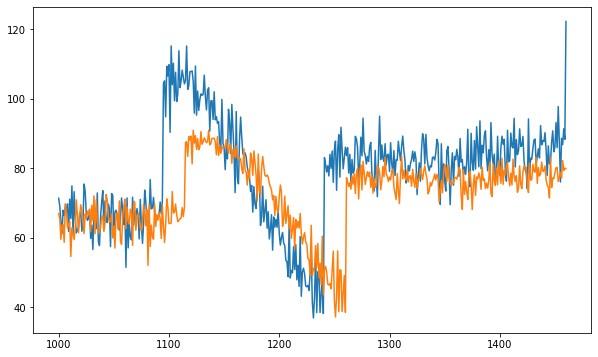

In [130]:
#PUTTING IT TOGETHER

forecast=[]

for time in range(len(series)-window_size):
    seq=series[time:time+window_size][np.newaxis]
    seq=np.expand_dims(seq, axis=-1)
    
    forecast.append(model.predict(seq))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))
plt.plot(time_val,x_val)
plt.plot(time_val, results)

In [136]:
print(tf.keras.metrics.mean_absolute_error(x_val,np.squeeze(results)))

tf.Tensor(10.145183, shape=(), dtype=float32)


- <b>The method above <font color='red'>did not</font> yield the same results, hence it is better to use the previous code structure when we incoorprate convolutions in our model. We need to utilise the <font color='red'>model_forecast</font> function.

## Optimising the model through Mini batch gradient

- Applied ML is very iterative, since we need to trial many models beforehand.
- Deep Learning works well with large datasets but this means we need to do a lot of preprocessing 
- <b>One way we can speed training is by using mini batches</b>(we have chuncks of our Xs and Ys in 1000 small batches which get fed to the model whilst doing <b>backpropagation</b>)
- A single epoch will allow us to carry out 1000 gradient descends steps whereas normally we would make a single step
- <b><font color='red'>This is ideal when dealing with very large dataset as you will be able to gauge how well the model is training without needing to finish.

In [1]:
import csv
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt


timestep=[]
sunspot=[]

with open('Sunspots.csv','r') as f:
    reader=csv.reader(f)
    #skip the head columns
    next(reader)
    #append values
    for line in reader:
        ##make sure to specify int and float for ease of plotting
        timestep.append(int(line[0]))
        sunspot.append(float(line[2]))  

In [2]:
#convert lists to array

timestep=np.array(timestep)
sunspot=np.array(sunspot)

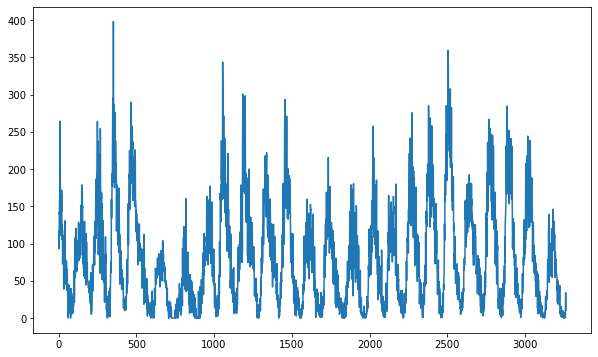

In [3]:
plt.figure(figsize=(10,6))
plt.plot(timestep,sunspot)

In [23]:
split_time=1000

time_train=timestep[:split_time]
x_train=sunspot[:split_time]

time_test=timestep[split_time:]
x_test=sunspot[split_time:]

window_size=20
batch_size=32
shuffle_buffer=1000

In [12]:

def windowed_dataset(series, window_size, batch_size, shuffle_buffer ):
    dataset=tf.data.Dataset.from_tensor_slices(series)
    
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1:]))
    
    dataset=dataset.batch(batch_size).prefetch(1)
    
    return dataset
    

In [14]:
dataset=windowed_dataset(x_train, window_size, batch_size, shuffle_buffer )

In [17]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])

model.fit(dataset, epochs=150)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
31/31 [==============================] - 3s 39ms/step - loss: 40094.3438 - acc: 0.0000e+00
Epoch 2/150
31/31 [==============================] - 0s 3ms/step - loss: 833.4282 - acc: 0.0000e+00
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 39.7733 - acc: 0.0000e+00
Epoch 4/150
31/31 [==============================] - 0s 3ms/step - loss: 8.0990 - acc: 0.0000e+00
Epoch 5/150
31/31 [==============================] - 0s 3ms/step - loss: 7.2462 - acc: 0.0000e+00
Epoch 6/150
31/31 [==============================] - 0s 4ms/step - loss: 7.1842 - acc: 0.0000e+00
Epoch 7/150
31/31 [==============================] - 0s 3ms/step - loss: 7.1160 - acc: 0.0000e+00
Epoch 8/150
31/31 [==============================] - 0s 3ms/step - loss: 7.1135 - acc: 0.0000e+00
Epoch 9/150
31/31 [==============================] - 0s 3ms/step - loss: 7.1660 - acc: 0.0000e+00
Epoch 10/150
31/31 [==============================] - 0s 3ms/step - loss: 7.1138 - acc: 0.0000e+00
Epoch 11/15

In [31]:
forecast=[]

for time in range(len(sunspot)-window_size):
    forecast.append(model.predict(sunspot[time:time+window_size][np.newaxis]))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

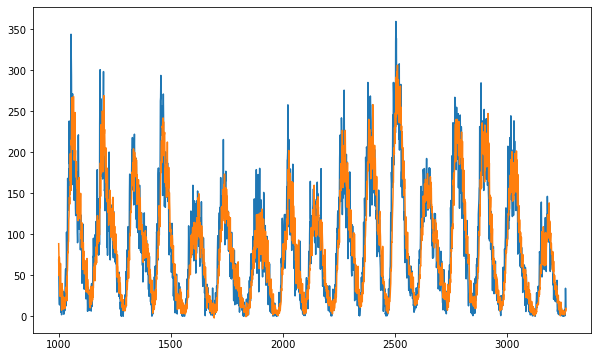

In [32]:
plt.figure(figsize=(10,6))
plt.plot(time_test, x_test)
plt.plot(time_test,results)

In [33]:
print(tf.keras.metrics.mean_absolute_error(x_test, results))

tf.Tensor(24.50347, shape=(), dtype=float32)


In [26]:
sunspot[split_time:]

array([68.9, 44.5, 23.3, ..., 34. , 21.8, 10.4])

In [29]:
results

array([88.352135 , 74.015236 , 49.25262  , ...,  8.229363 ,  9.839345 ,
        6.5484176], dtype=float32)

- Our training set was 1000 whereas the testing set was 2500. This is not the best split hence we will adjust this and use an optimal learning rate.

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

sunspot=[]
timestep=[]
with open('Sunspots.csv', 'r') as f:
    reader=csv.reader(f)
    
    next(reader)
    
    for row in reader:
        timestep.append(int(row[0]))
        sunspot.append(float(row[2]))

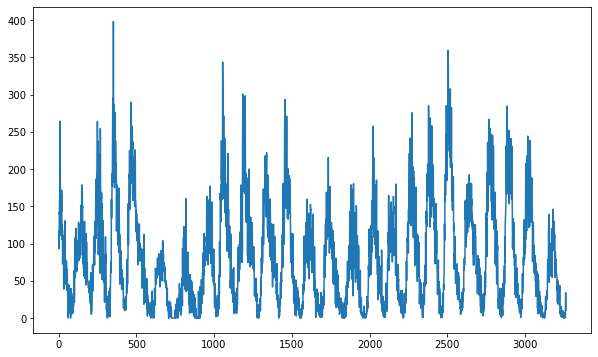

In [8]:
series=np.array(sunspot)
timestep=np.array(timestep)

plt.figure(figsize=(10,6))
plt.plot(timestep,series)

In [10]:
split_time=2500

time_train=timestep[:split_time]
x_train=series[:split_time]

time_val=timestep[split_time:]
x_val=series[split_time:]

window_size=20
batch_size=32
shuffle_buffer=1000

In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset=tf.data.Dataset.from_tensor_slices(series)
    
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1],window[-1:]))
    
    dataset=dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [30]:
dataset=windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)

In [32]:
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size],activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])

history=model.fit(dataset, epochs=100)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
78/78 [==============================] - 2s 7ms/step - loss: 6139.2803 - acc: 0.0113
Epoch 2/100
78/78 [==============================] - 1s 7ms/step - loss: 1563.0814 - acc: 0.0036
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 1378.9323 - acc: 0.0032
Epoch 4/100
78/78 [==============================] - 1s 6ms/step - loss: 1260.1788 - acc: 0.0032
Epoch 5/100
78/78 [==============================] - 1s 7ms/step - loss: 1172.5732 - acc: 0.0028
Epoch 6/100
78/78 [==============================] - 1s 7ms/step - loss: 1107.5405 - acc: 0.0028
Epoch 7/100
78/78 [==============================] - 1s 7ms/step - loss: 1059.0095 - acc: 0.0028
Epoch 8/100
78/78 [==============================] - 1s 7ms/step - loss: 1022.0636 - acc: 0.0028
Epoch 9/100
78/78 [==============================] - 1s 6ms/step - loss: 991.6943 - acc: 0.0028
Epoch 10/100
78/78 [==============================] - 1s 6ms/step - loss: 968.6535 - acc: 0.0028
Epoch 11/100
78/78 [===========

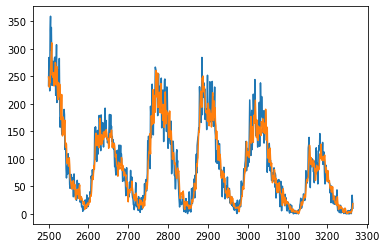

In [33]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.plot(time_val, x_val)
plt.plot(time_val, results)

In [34]:
print(tf.keras.metrics.mean_absolute_error(x_val,results).numpy())

18.408173


### Using an optimal learning rate and changing window size

In [36]:
split_time=3000

time_train=timestep[:split_time]
x_train=series[:split_time]

time_val= timestep[split_time:]
x_val=series[split_time:]

window_size=60
batch_size=32
shuffle_buffer=1000

In [38]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

In [41]:
dataset= windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)


tf.keras.backend.clear_session()

model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
history=model.fit(dataset, epochs=100, callbacks=[lr_scheduler])

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
92/92 [==============================] - 2s 9ms/step - loss: 5502.4331 - acc: 0.0010
Epoch 2/100
92/92 [==============================] - 1s 9ms/step - loss: 2277.3252 - acc: 0.0031
Epoch 3/100
92/92 [==============================] - 1s 9ms/step - loss: 1699.0774 - acc: 0.0031
Epoch 4/100
92/92 [==============================] - 1s 9ms/step - loss: 1449.8383 - acc: 0.0027
Epoch 5/100
92/92 [==============================] - 1s 9ms/step - loss: 1317.9764 - acc: 0.0020
Epoch 6/100
92/92 [==============================] - 1s 9ms/step - loss: 1237.0380 - acc: 0.0024
Epoch 7/100
92/92 [==============================] - 1s 9ms/step - loss: 1177.7954 - acc: 0.0024
Epoch 8/100
92/92 [==============================] - 1s 9ms/step - loss: 1126.8334 - acc: 0.0024: 0s - loss: 1
Epoch 9/100
92/92 [==============================] - 1s 9ms/step - loss: 1085.9640 - acc: 0.0024
Epoch 10/100
92/92 [==============================] - 1s 9ms/step - loss: 1047.6084 - acc: 0.0024
Epoch 11/100
92

92/92 [==============================] - 1s 9ms/step - loss: 5246.2021 - acc: 0.0010
Epoch 81/100
92/92 [==============================] - 1s 9ms/step - loss: 5093.1436 - acc: 0.0010
Epoch 82/100
92/92 [==============================] - 1s 9ms/step - loss: 4974.3467 - acc: 0.0010
Epoch 83/100
92/92 [==============================] - 1s 9ms/step - loss: 4886.5620 - acc: 0.0010
Epoch 84/100
92/92 [==============================] - 1s 9ms/step - loss: 4824.4390 - acc: 0.0010 ETA: 0s - loss: 4309.
Epoch 85/100
92/92 [==============================] - 1s 9ms/step - loss: 4783.3345 - acc: 0.0010
Epoch 86/100
92/92 [==============================] - 1s 9ms/step - loss: 4760.7539 - acc: 0.0010
Epoch 87/100
92/92 [==============================] - 1s 9ms/step - loss: 4744.4302 - acc: 0.0010
Epoch 88/100
92/92 [==============================] - 1s 9ms/step - loss: 4738.5498 - acc: 0.0010
Epoch 89/100
92/92 [==============================] - 1s 9ms/step - loss: 4735.1899 - acc: 0.0010
Epoch 90/10

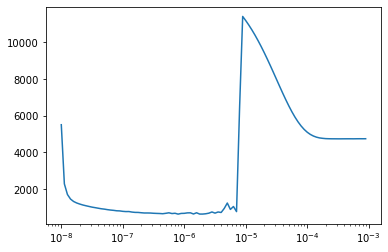

In [43]:
plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])

In [45]:
#optimal 3x10-7

dataset= windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)


tf.keras.backend.clear_session()

model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.SGD(lr=3e-7, momentum=0.9)
model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
history=model.fit(dataset, epochs=100,)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
92/92 [==============================] - 2s 9ms/step - loss: 1356.1869 - acc: 0.0010
Epoch 2/100
92/92 [==============================] - 1s 9ms/step - loss: 810.9814 - acc: 0.0010
Epoch 3/100
92/92 [==============================] - 1s 9ms/step - loss: 764.6157 - acc: 0.0010
Epoch 4/100
92/92 [==============================] - 1s 9ms/step - loss: 734.2478 - acc: 0.0010
Epoch 5/100
92/92 [==============================] - 1s 9ms/step - loss: 736.5110 - acc: 0.0010
Epoch 6/100
92/92 [==============================] - 1s 10ms/step - loss: 683.7991 - acc: 0.0010
Epoch 7/100
92/92 [==============================] - 1s 9ms/step - loss: 676.9905 - acc: 0.0010
Epoch 8/100
92/92 [==============================] - 1s 9ms/step - loss: 672.8109 - acc: 0.0010
Epoch 9/100
92/92 [==============================] - 1s 9ms/step - loss: 661.3461 - acc: 0.0010
Epoch 10/100
92/92 [==============================] - 1s 9ms/step - loss: 658.9165 - acc: 0.0010
Epoch 11/100
92/92 [=================

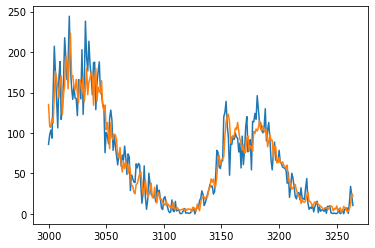

In [46]:
forecast=[]

for time in range(len(series)-window_size):
    forecast.append(model.predict(series[time:time+window_size][np.newaxis]))
    
forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.plot(time_val, x_val)
plt.plot(time_val, results)

In [47]:
print(tf.keras.metrics.mean_absolute_error(x_val,results).numpy())

13.760322


### Now lets do the whole process using LSTM

In [5]:
split_time=3000

time_train=timestep[:split_time]
x_train=sunspot[:split_time]

time_val= timestep[split_time:]
x_val=sunspot[split_time:]

window_size=60
batch=32
shuffle_buffer=1000

In [6]:
def windowed_dataset(series, window_size, batch, shuffle_buffer):
    series=tf.expand_dims(series, axis=-1)
    
    dataset=tf.data.Dataset.from_tensor_slices(series)
    dataset=dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset=dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset=dataset.shuffle(shuffle_buffer)
    dataset=dataset.map(lambda window:(window[:-1],window[-1:]))
    
    dataset=dataset.batch(batch).prefetch(1)
    
    return dataset

In [7]:
def model_forecast(model, series, window_size):
    ds=tf.data.Dataset.from_tensor_slices(series)
    
    ds=ds.window(window_size, shift=1, drop_remainder=True)
    ds=ds.flat_map(lambda window: window.batch(window_size))
    
    ds=ds.batch(batch_size).prefetch(1)
    
    forecast=model.predict(ds)
    
    return forecast

In [60]:
dataset=windowed_dataset(x_train, window_size, batch, shuffle_buffer)

In [61]:
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/20))

In [72]:
tf.keras.backend.clear_session()


model=tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu', input_shape=[None,1]),#coz we expanded dims
    
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer, metrics=['mae'])

history=model.fit(dataset, epochs=100, callbacks=[lr_scheduler], verbose=1)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
92/92 [==============================] - 3s 13ms/step - loss: 60.7961 - mae: 61.2923
Epoch 2/100
92/92 [==============================] - 2s 13ms/step - loss: 60.6935 - mae: 61.1897: 0s - loss: 56.0425 - mae:
Epoch 3/100
92/92 [==============================] - 2s 14ms/step - loss: 60.5828 - mae: 61.0790
Epoch 4/100
92/92 [==============================] - 2s 13ms/step - loss: 60.4630 - mae: 60.9592
Epoch 5/100
92/92 [==============================] - 2s 13ms/step - loss: 60.3364 - mae: 60.8326: 0s - loss: 55.1744 -
Epoch 6/100
92/92 [==============================] - 2s 13ms/step - loss: 60.2021 - mae: 60.6984
Epoch 7/100
92/92 [==============================] - 2s 13ms/step - loss: 60.0612 - mae: 60.5575
Epoch 8/100
92/92 [==============================] - 2s 14ms/step - loss: 59.9148 - mae: 60.4110
Epoch 9/100
92/92 [==============================] - 2s 14ms/step - loss: 59.7635 - mae: 60.2596
Epoch 10/100
92/92 [==============================] - 2s 13ms/step - loss: 59.

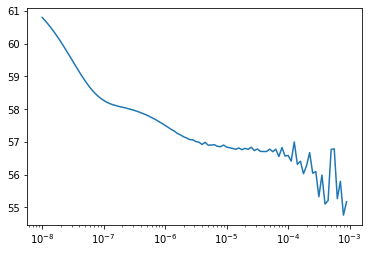

In [73]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [88]:
tf.keras.backend.clear_session()


model=tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu', input_shape=[None,1]),#coz we expanded dims
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x*400.0)
    
])

optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), 
              optimizer=optimizer, metrics=['mae'])

history=model.fit(dataset, epochs=100, verbose=1)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
92/92 [==============================] - 27s 194ms/step - loss: 42.5275 - mae: 43.0248
Epoch 2/100
92/92 [==============================] - 18s 188ms/step - loss: 35.1171 - mae: 35.6140
Epoch 3/100
92/92 [==============================] - 20s 212ms/step - loss: 30.4476 - mae: 30.9442
Epoch 4/100
92/92 [==============================] - 19s 204ms/step - loss: 29.6574 - mae: 30.1535
Epoch 5/100
92/92 [==============================] - 20s 211ms/step - loss: 22.7948 - mae: 23.2900
Epoch 6/100
92/92 [==============================] - 19s 207ms/step - loss: 23.3065 - mae: 23.8013
Epoch 7/100
92/92 [==============================] - 20s 214ms/step - loss: 22.7589 - mae: 23.2536
Epoch 8/100
92/92 [==============================] - 19s 204ms/step - loss: 23.1609 - mae: 23.6549
Epoch 9/100
92/92 [==============================] - 19s 205ms/step - loss: 21.4977 - mae: 21.9927
Epoch 10/100
92/92 [==============================] - 20s 210ms/step - loss: 20.5994 - mae: 21.0928
Epoch 11/

In [92]:
LSTM_forecast = model_forecast(model, series[0:, np.newaxis], window_size)
LSTM_forecast = LSTM_forecast[split_time - window_size:-1, -1, 0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [105]:
LSTM_forecast = model_forecast(model, series[0:, np.newaxis], window_size)
LSTM_forecast.shape

(3206, 1)

In [110]:
j=[]
for i in LSTM_forecast:
    j.append(i)
j=np.array(j)
j=np.squeeze(j)
j.shape

(3206,)

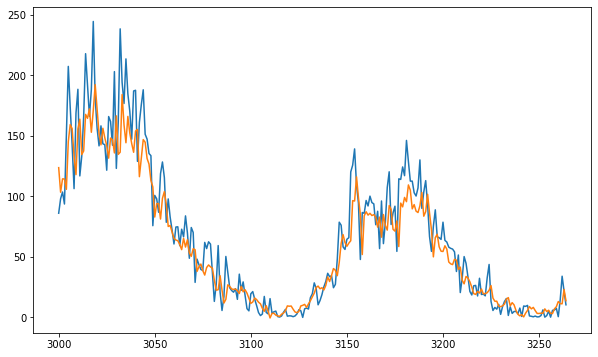

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(time_val, x_val)
plt.plot(time_val, j[split_time-window_size:-1])

In [114]:
print(tf.keras.metrics.mean_absolute_error(x_val,j[split_time-window_size:-1]))

tf.Tensor(14.294165, shape=(), dtype=float32)


- Increasing the window size to 60 and using more simpler architecture we were able to reduce error.

### Proposed LSTM model solution

In [30]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [31]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [32]:
split_time=3000

time_train=timestep[:split_time]
x_train=sunspot[:split_time]

time_val= timestep[split_time:]
x_val=sunspot[split_time:]

window_size=60
batch_size=32
shuffle_buffer=1000

In [33]:
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)

In [42]:
tf.keras.backend.clear_session()
model= tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None, 1]),
    
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x*400)    
])

optimizer= tf.keras.optimizers.SGD(lr=1e-5 , momentum=0.9)

# lr_schedule= tf.keras.callbacks.LearningRateScheduler(
# lambda epoch: 1e-8 * 10**(epoch/20))


model.compile(loss=tf.keras.losses.Huber(),
             optimizer=optimizer,
             metrics=['mae'])

history= model.fit(train_set, epochs=35)

C:\Users\A\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/35
92/92 [==============================] - 9s 54ms/step - loss: 29.1848 - mae: 29.6803
Epoch 2/35
92/92 [==============================] - 5s 54ms/step - loss: 24.1185 - mae: 24.6135
Epoch 3/35
92/92 [==============================] - 5s 56ms/step - loss: 21.4440 - mae: 21.9380
Epoch 4/35
92/92 [==============================] - 5s 56ms/step - loss: 21.5519 - mae: 22.0462- 
Epoch 5/35
92/92 [==============================] - 5s 55ms/step - loss: 20.2306 - mae: 20.7240
Epoch 6/35
92/92 [==============================] - 5s 57ms/step - loss: 19.5850 - mae: 20.0785
Epoch 7/35
92/92 [==============================] - 5s 57ms/step - loss: 19.4827 - mae: 19.9758
Epoch 8/35
92/92 [==============================] - 5s 55ms/step - loss: 18.9230 - mae: 19.4160
Epoch 9/35
92/92 [==============================] - 5s 54ms/step - loss: 18.6382 - mae: 19.1308
Epoch 10/35
92/92 [==============================] - 5s 53ms/step - loss: 18.0463 - mae: 18.5387
Epoch 11/35
92/92 [==================

In [43]:
lstm_forecast = model_forecast(model, sunspot[0:, np.newaxis], window_size)
lstm_forecast = lstm_forecast[split_time - window_size:-1, -1, 0]

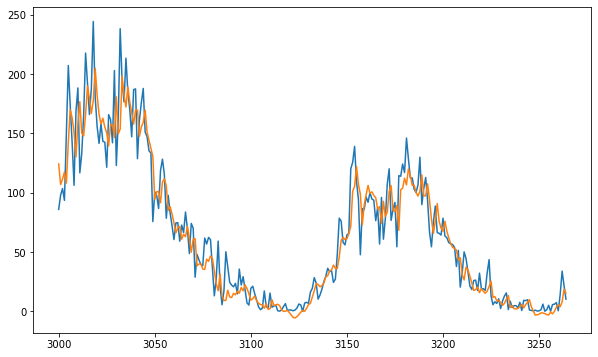

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(time_val, x_val)
plt.plot(time_val, lstm_forecast)

In [45]:
tf.keras.metrics.mean_absolute_error(x_val, results).numpy()

14.123885

<Figure size 432x288 with 0 Axes>

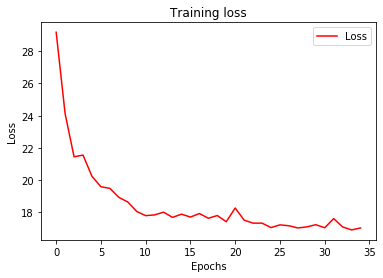

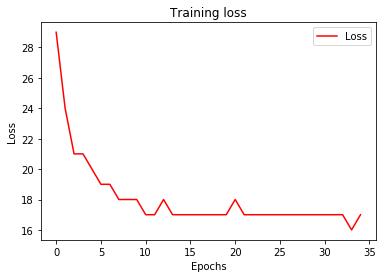

<Figure size 432x288 with 0 Axes>

In [80]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

# zoomed_loss = loss[3100:]
# zoomed_epochs = range(len(zoomed_loss))

zoomed_loss = [int(i) for i in loss]
zoomed_epochs = range(len(zoomed_loss))


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()


## Summary
- <b>The sunspot activity dataset is not very easy to predict for  as the 11 years seasons are not prefectly seasonal. As a result we combined LSTM and Convolutions in order to predict with higher accuracy. The Dense layer was only able to get us so far (MAE=+14) even after we increased the number of neurons and optimized the learning rate. With the use of LSTM combined with convolutions we were able to get our MAE down to 13 . It is also important to note that we were able to get a higher accuracy without using Bidirectional LSTM </b>
- *Make sure your LSTM layers have return_sequences=True even when feeding the output to a Dense layer

- <b>If there is a lot of noise in our loss once we plot it, the best thing to do is to increase the batch size</b>
- <b> We should try to choose a window size and batch_size that is divisible by the length of the dataset, we should do this for the filters in the convolution layer aswell and the neurons.